In [1]:
%matplotlib inline
import math, time, random, datetime

#Data Manipulation
import numpy as np
import pandas as pd

#Data Visualisation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

#Machine Learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

import warnings
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
gender_submission = pd.read_csv('gender_submission.csv')

In [5]:
len(train)

891

In [6]:
test.head()
len(test)

418

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
len(train)

891

<AxesSubplot:>

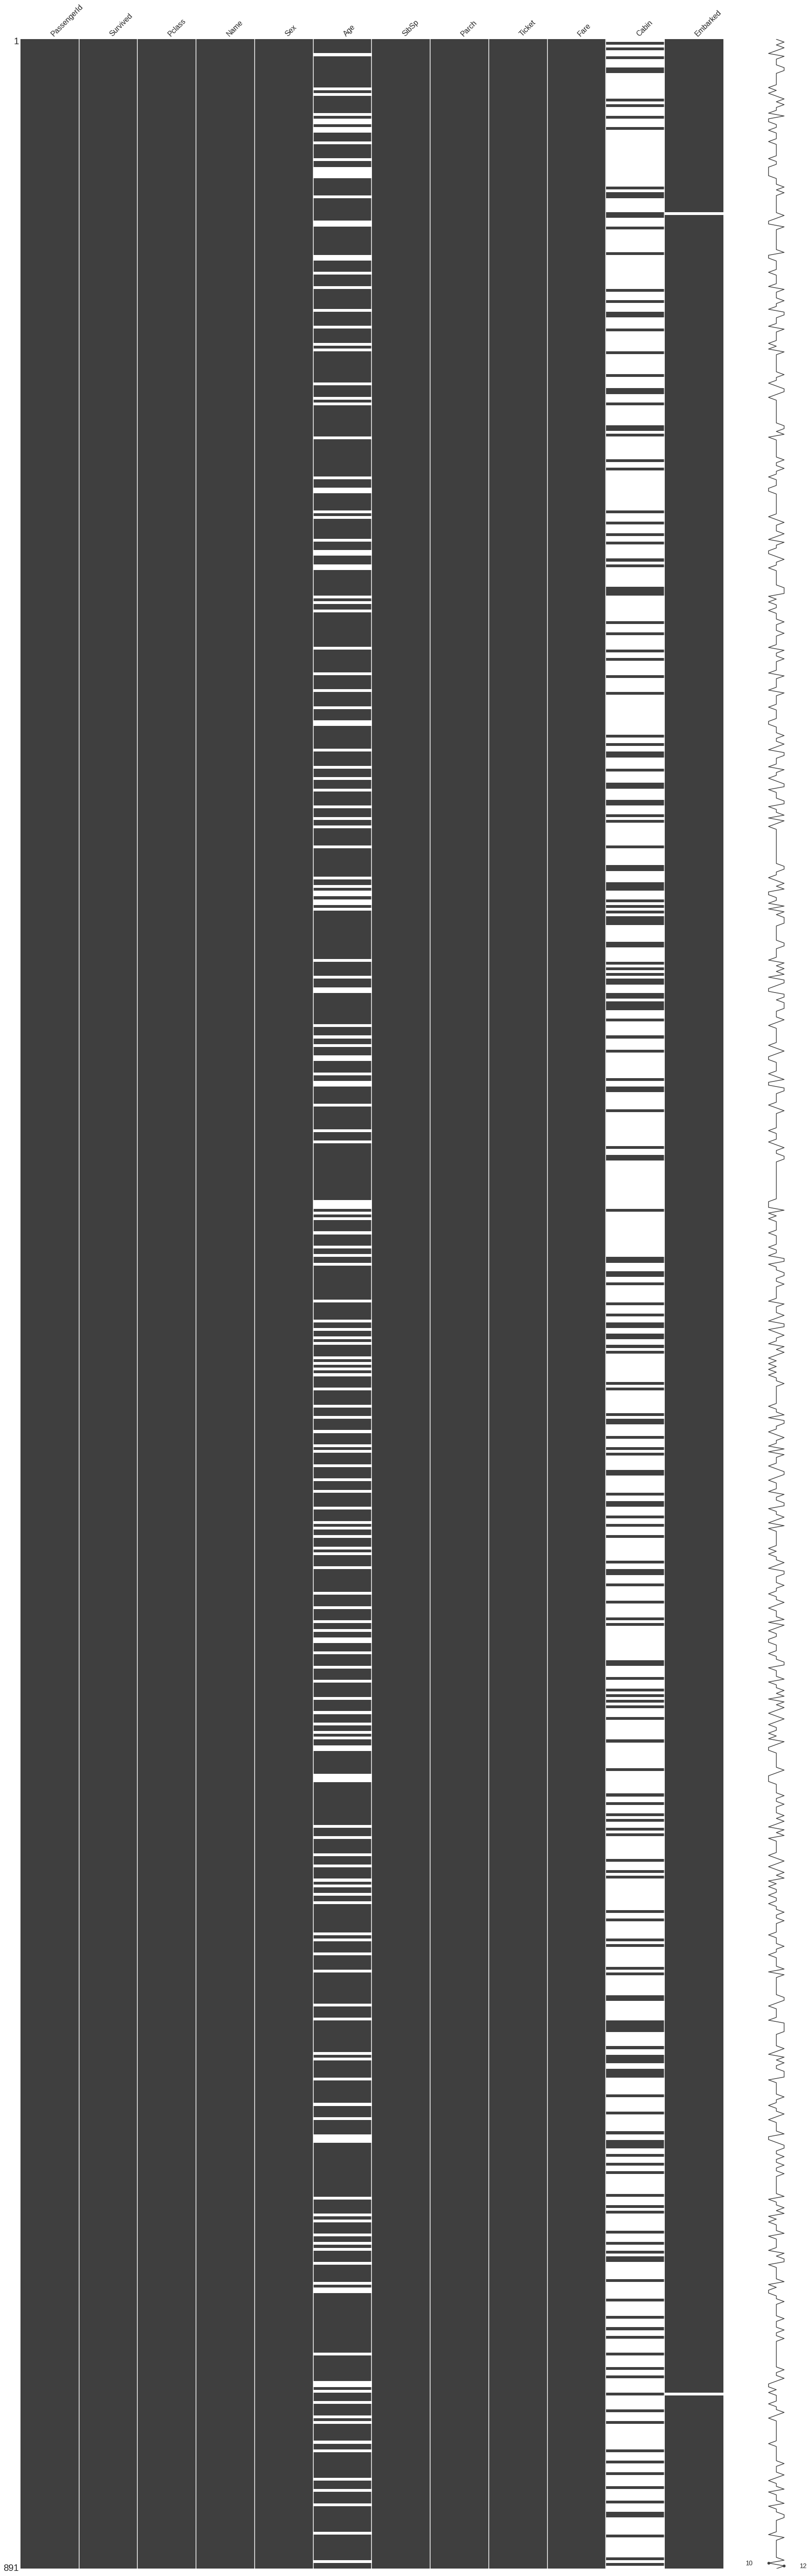

In [11]:
missingno.matrix(train,figsize = (30,100))

In [12]:
def find_missing_values(df,columns):
    missing_vals = {}
    print('Number Of Missing or NaN values for each column')
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length - total_column_values
    return missing_vals

missing_vals = find_missing_values(train, train.columns)
missing_vals

Number Of Missing or NaN values for each column


{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [13]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
train.shape

(891, 12)

In [15]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

In [16]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0    549
1    342
Name: Survived, dtype: int64


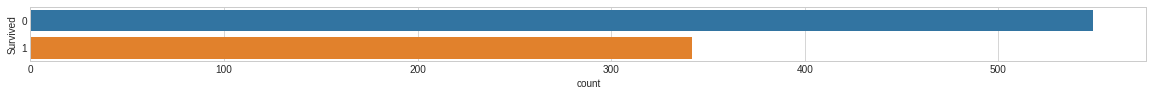

In [18]:
fig = plt.figure(figsize = (20,1))
sns.countplot(y = 'Survived', data = train);
print(train.Survived.value_counts())

In [19]:
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']


In [20]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [21]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [22]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

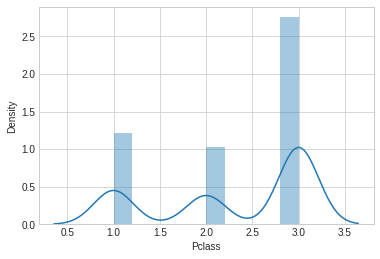

In [23]:
sns.distplot(train.Pclass)

In [24]:
missing_vals['Pclass']

0

In [25]:
train['Name'].value_counts().head(50)

Rosblom, Mr. Viktor Richard                                                           1
Blackwell, Mr. Stephen Weart                                                          1
Coleff, Mr. Peju                                                                      1
Rugg, Miss. Emily                                                                     1
Panula, Master. Eino Viljami                                                          1
Farrell, Mr. James                                                                    1
Bonnell, Miss. Elizabeth                                                              1
Andrews, Mr. Thomas Jr                                                                1
Touma, Mrs. Darwis (Hanne Youssef Razi)                                               1
Thomas, Master. Assad Alexander                                                       1
Wiklund, Mr. Jakob Alfred                                                             1
Ford, Miss. Doolina Margaret "Da

In [26]:
len(train)

891

<AxesSubplot:xlabel='count', ylabel='Sex'>

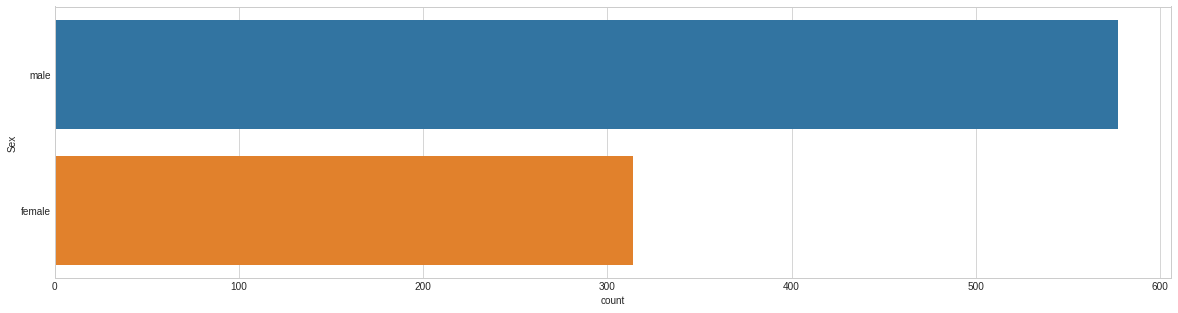

In [27]:
plt.figure(figsize = (20,5))
sns.countplot(y = 'Sex', data = train)

In [28]:
missing_vals['Sex']

0

In [29]:
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female',1,0)
df_con['Sex'] = train['Sex']

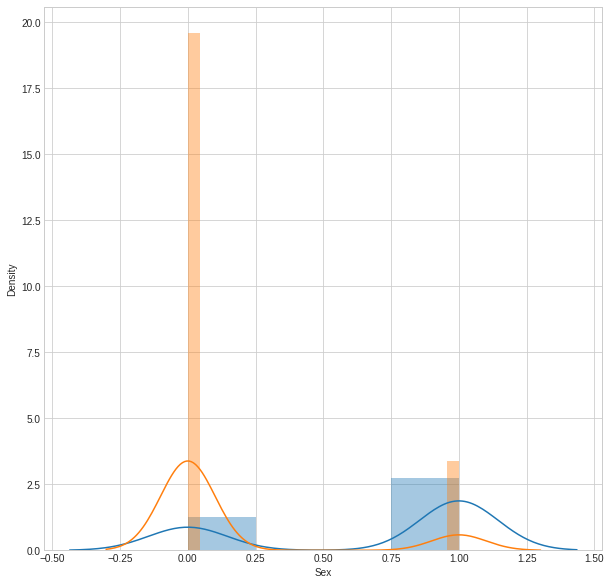

In [30]:
fig = plt.figure(figsize = (10,10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws = {'label':'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws = {'label':'Did Not Survived'});

In [31]:
df_bin

,Survived,Sex
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,1
889,1,0


In [32]:
df_con

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


In [33]:
missing_vals['Age']

177

In [34]:
missing_vals['SibSp']

0

In [35]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [36]:
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

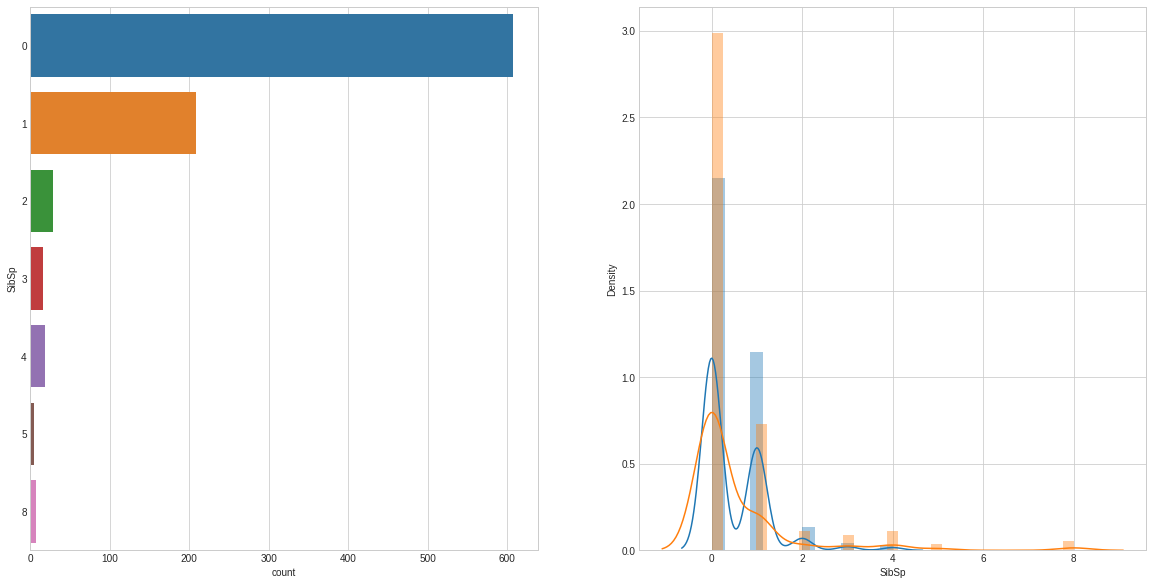

In [37]:
def plot_count_dist(data, bin_df, label_column, target_column,figsize =(20,5), use_bin_df = False):
    if use_bin_df:
        fig= plt.figure(figsize=figsize)
        plt.subplot(1,2,1)
        sns.countplot(y=target_column, data = bin_df)
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column] == 1][target_column],
                     kde_kws = {'label':'Survived'});
        sns.distplot(data.loc[data[label_column] == 0][target_column],
                     kde_kws = {'label':'Did not survive'});
    else:
        fig= plt.figure(figsize=figsize)
        plt.subplot(1,2,1)
        sns.countplot(y=target_column, data = data)
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column] == 1][target_column],
                     kde_kws = {'label':'Survived'});
        sns.distplot(data.loc[data[label_column] == 0][target_column],
                     kde_kws = {'label':'Did not survive'});
        


plot_count_dist(train, bin_df = df_bin,label_column = 'Survived',target_column = 'SibSp', figsize = (20,10))

In [38]:
missing_vals['Parch']

0

In [39]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [40]:
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

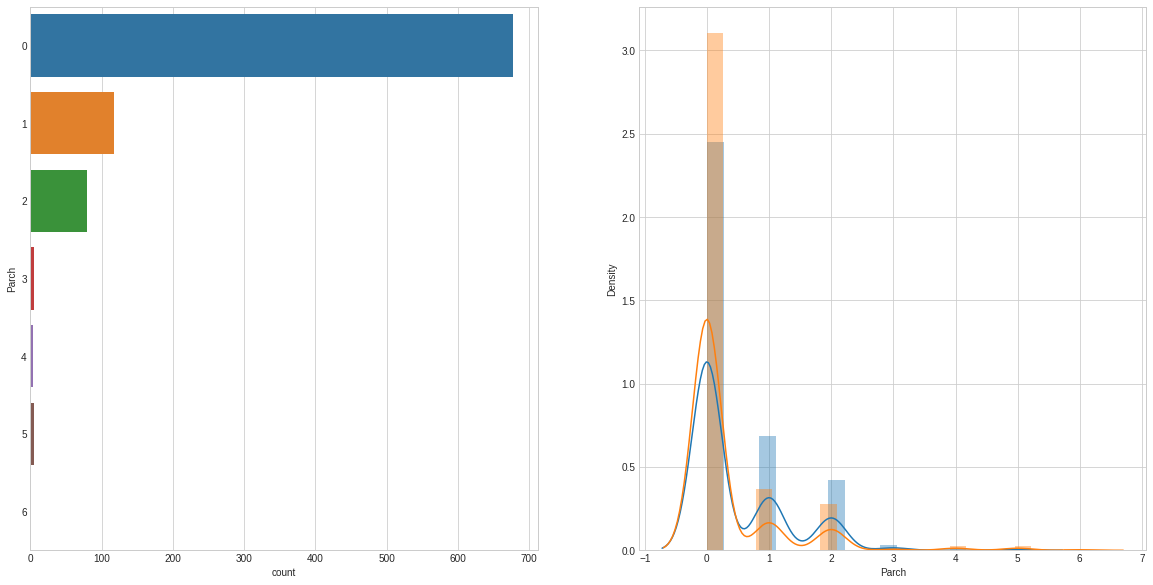

In [41]:
plot_count_dist(train, 
                bin_df = df_bin,
                label_column = 'Survived',
                target_column = 'Parch', 
                figsize = (20,10),
                use_bin_df = True)

In [42]:
df_con.head()

,Survived,Sex,SibSp,Parch
0,0,male,1,0
1,1,female,1,0
2,1,female,0,0
3,1,female,1,0
4,0,male,0,0


In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df_bin.head()

,Survived,Sex,SibSp,Parch
0,0,0,1,0
1,1,1,1,0
2,1,1,0,0
3,1,1,1,0
4,0,0,0,0


In [45]:
missing_vals['Ticket']

0

<AxesSubplot:xlabel='count', ylabel='Ticket'>

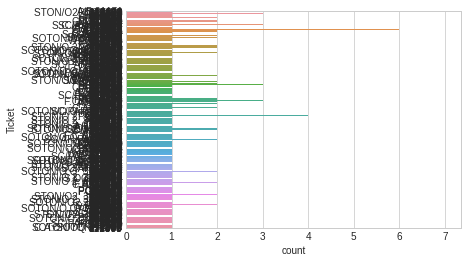

In [46]:
sns.countplot(y = 'Ticket',data = train)

In [47]:
train.Ticket.value_counts()

CA. 2343    7
347082      7
1601        7
347088      6
CA 2144     6
           ..
13214       1
36864       1
350406      1
A/5 3594    1
2926        1
Name: Ticket, Length: 681, dtype: int64

In [48]:
missing_vals['Fare']

0

<AxesSubplot:xlabel='count', ylabel='Fare'>

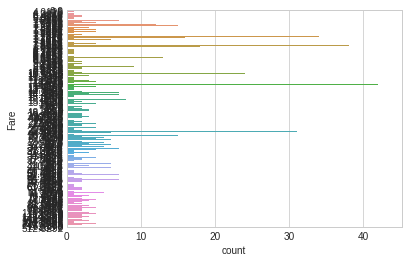

In [49]:
sns.countplot(y = 'Fare',data = train)

In [50]:
train.Fare.dtype

dtype('float64')

In [51]:
df_bin['Fare'] = pd.cut(train['Fare'], bins = 5)
df_con['Fare'] = train['Fare']

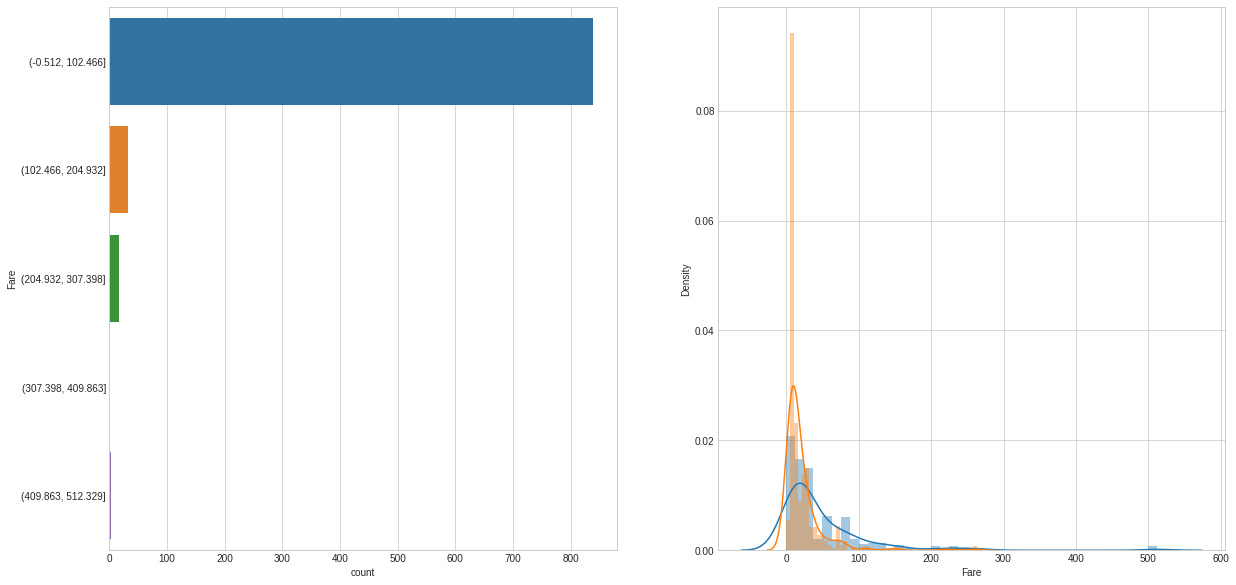

In [52]:
plot_count_dist(train, 
                bin_df = df_bin,
                label_column = 'Survived',
                target_column = 'Fare', 
                figsize = (20,10),
                use_bin_df = True)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABNQAAAJJCAYAAABiYGouAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAAByDUlEQVR4nOzdd3hUZd7G8Xtm0gshCWlAwNARBQUbUlUQxbK7SAkIqGtZBURRlLIqKIKIyK6ADVcRsRBERNx1RVRUFgII+IIgvYaW3ntm5v0jMBJTyEkbMvl+rivXzJzynN9zEuBw5znnMdntdrsAAAAAAAAAVIrZ2QUAAAAAAAAA9QmBGgAAAAAAAGAAgRoAAAAAAABgAIEaAAAAAAAAYACBGgAAAAAAAGAAgRoAAAAAAABggJuzC4Bx27Ztc3YJAACgDnTr1s3ZJeA8XIMBAOD6Knv9RaBWTzWEC+w9e/aoY8eOzi6j1jWEfjaEPkr005U0hD5K9PNiR3hzcWoI12CVVV//bNUlzlHFOD8XxjmqGOenYpyfC/vjOTJy/cUtnwAAAAAAAIABBGoAAAAAAACAAQRqAAAAAAAAgAEEagAAAAAAAIABBGoAAAAAAACAAQRqAAAAAAAAgAEEagAAAAAAAIABBGoAAAAAAACAAQRqAAAAAAAAgAFuzi4AVdPtqQ+cXUId+dnZBdSRhtDPhtBHiX66kobQR4l+Vt22V0bXeJsAAACoHxihBgAAAAAAABhAoAYAAAAAAAAYQKAGAAAAAAAAGECgBgAAAAAAABhAoAYAAAAAAAAYQKAGAAAAAAAAGECgBgAAAAAAABhAoAYAAAAAAAAYQKAGAAAAAAAAGECgBgAAAAAAABhAoAYAAAAAAAAYQKAGAAAAAAAAGECgBgAAAAAAABhAoAYAAAAAAAAY4ObsAgAAAAC4gK2LS36+6j7n1AEAQB1ghBoAAAAAAABgAIEaAAAAAAAAYACBGgAAAAAAAGAAgRoAAAAAAABgAIEaAAAAAAAAYACBGgAAAAAAAGAAgRoAAAAAAABgAIEaAAAAAAAAYACBGgAAAAAAAGAAgRoAAAAAAABgAIEaAAAAAAAAYACBGgAAAAAAAGAAgRoAAAAAAABgAIEaAAAAAAAAYACBGgAAAAAAAGAAgRoAAAAAAABgAIEaAAAAAAAAYACBGgAAAAAAAGAAgRoAAAAAAABgAIEaAAAAAAAAYACBGgAAAAAAAGAAgRoAAAAAAABgAIEaAAAAAAAAYACBGgAAAAAAAGCA0wK17OxsjR49Wunp6SWWZ2Zm6qGHHtLw4cN1//33Ky0trcT6EydO6Morr9SoUaM0atQojR8/3rHuv//9r6688krt37/fsWzTpk0aOnSooqOjNWXKFNlstnJrstlsmjt3rq677roSy//1r39p8ODBGjJkiH788UdHnY888ohGjhypESNG6NChQ2W2abfbFR0drQULFjiWzZo1S4MGDVJ0dLTi4uIkSadPn9bw4cM1ePBgPffcc5Kk8ePH66qrrirRHwAAAAAAADiX0wK1hQsXaujQoQoICCixfMmSJbrmmmv0ySef6Oabb9Y777xTat+oqCgtXbpUS5cu1fz58yVJW7Zs0U8//aT27duX2Pa5557T/PnztWzZMmVnZ2v9+vXl1rRo0SJFRETIbrc7lsXFxemrr77Sxx9/rLffflsvvfSSrFarFi9erK5du+rDDz/UQw895Kjjjz799FMVFhY6Pv/444+Ki4vTypUr9be//U0bNmyQJM2ePVt//etftWLFClksFp06dUrz589Xx44dL3AmAQAAAAAAUJecEqjl5+drzZo1uvXWW0uti42NVf/+/SVJN9xwg2JjYyvV5qWXXqqXXnpJ7u7uJZavXLlS4eHhkqSgoCClpqaW28bIkSN19913l1i2efNm9erVSx4eHgoKClKzZs108OBB/e1vf9M999zjaPePI+kkKSUlRV9++aWio6Mdy77//nvdcccdjv5FR0fLZrNp27ZtuvHGGyVJ06ZNU9OmTSvVbwAAAAAAANQtpwRqO3fuVLt27WSxWEqtS0pKUlBQkCQpODhYCQkJZW4zfvx4RUdHa/Xq1ZIkPz+/Mo91bnlCQoI2bNigPn36lFtXWW2cX49UHJ4lJibK09NTHh4ekopH1d1+++2l9n3llVc0YcKEEv08efKkdu/erXvuuUd/+9vfdPLkSaWkpMjX11cvvfSShg8frldffbXcGgEAAAAAAOBcTgnUEhISHKPGKnL+rZfnNG7cWI899pheffVVvfHGG3rttdfKDN3Ol5ycrIcffljTpk1TYGBglesuq6ZXXnlFHh4eGjJkSInlP//8sywWi7p27Vpq/4CAAC1ZskQDBw7Uyy+/LLvdrvj4eI0ePVoffvihfvvtN/3www/VqhMAAAAAAAC1w81ZBzaZTJKKn1E2depUSdKkSZMUGhqqxMRE+fv7Kz4+XqGhoSX28/Pz01133SWpeLTYZZddpsOHD5fa7pysrCw9+OCDevzxx9WzZ0/DdYaGhurIkSOOz+fX9NprryklJUUzZ84std93332nXbt2aejQoUpJSVFBQYEiIyPVpEkTXX311ZKkXr166e2331ZgYKCaNm2qFi1aSJK6d++uAwcOqG/fvobrBQAAAAAAQO1ySqAWGhqqM2fOSJIiIyO1dOlSx7oePXro66+/1pgxY/TNN9+oV69eJfbdtGmT1q1bpylTpignJ0d79+5VVFRUuceaPXu27rnnHvXu3btKtV533XVavHixHn30UaWmpiohIUFt2rTR1q1btXPnTr3zzjsym0sP9Js8ebLj/cqVK3Xy5En9+c9/lru7u9avX68rr7xSu3btUlRUlNzc3BQZGamjR4/qkksu0e7du3XbbbdVqV4AAAAAAADULqcEap07d9a+fftktVpLPUdt1KhReuqppzRixAg1atRIr7zyiiRp5syZGj16tK666iqtWrVKw4YNk9Vq1UMPPaSwsDB9+umnWr16tfbs2aMpU6aodevWev7557Vq1SodO3ZMK1askCTdfvvtuvHGG7VgwQK98MILJY49Y8YM7d+/X1lZWRo1apRuvPFG3XfffRo6dKhGjhwpk8mk6dOny2w265NPPtHp06cdExMEBARo4cKFjjojIyPL7Pstt9yi559/XtHR0XJzc9OMGTMkSVOnTtXkyZNlt9vVrl07xwQFAAAAAAAAuLg4JVDz9PRU//79tWbNGg0cOLDEOl9fX73xxhul9vn73//ueD979uxS64cMGVLqOWaStGvXrjJr8PX1LbXs2WefLXPbUaNGadSoUSWWlTdxwPl1njNo0CDHe4vFUirIk6SWLVvqk08+KbNNAAAAAAAAXDycMimBJD366KOKiYlRenp6nR+7oKBAPXr0qPPjGjV+/Hjt2bPH2WUAAAAAAADgPE6blMDPz09LlixxyrE9PDyqNEFBXZs/f76zSwAAAAAAAMAfOG2EGgAAAAAAAFAfEagBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAa4ObsAVM22V0Y7u4Rat2fPHnXs2NHZZdS6htDPhtBHiX66kobQR4l+AgAAAFXFCDUAAAAAAADAAEaoAQAAwOXMmjVLO3bskMlk0tSpU9W5c2fHuo0bN2revHmyWCzq3bu3xo4dq+zsbE2aNEnp6ekqLCzU2LFj1atXLyf2AAAAXMwI1AAAAOBStmzZomPHjikmJkaHDh3S1KlTFRMT41j/4osv6t1331VYWJhGjhypAQMGaNOmTYqKitKTTz6p+Ph43XPPPfr666+d2AsAAHAx45ZPAAAAuJTY2Fj169dPktS6dWulp6crKytLkhQXF6eAgABFRETIbDarT58+io2NVWBgoNLS0iRJGRkZCgwMdFb5AACgHiBQAwAAgEtJSkoqEYgFBQUpMTFRkpSYmKigoKBS62677TadOnVK/fv318iRIzVp0qQ6rxsAANQf3PIJAAAAl2a32y+4zRdffKGmTZvq3Xff1d69ezV16lStXLmy1HZ79uypjRLrpby8vBLno/GZMyXWp3GuSp0jlMT5uTDOUcU4PxXj/FxYdc4RgRoAAABcSmhoqJKSkhyfExISFBISUua6+Ph4hYaGavv27erZs6ckqUOHDkpISJDVapXFYinRdseOHeugB/XDnj17Sp6P7E0l1kdwrkqfI5TA+bkwzlHFOD8V4/xc2B/P0bZt2yq9L7d8AgAAwKX06NFDa9askSTt3r1boaGh8vPzkyQ1b95cWVlZOnHihIqKirRu3Tr16NFDLVu21I4dOyRJJ0+elK+vb6kwDQAA4BxGqAEAAMCldO3aVZ06dVJ0dLRMJpOmTZumlStXyt/fX/3799f06dP15JNPSpIGDhyoqKgohYaGaurUqRo5cqSKioo0ffp053YCAABc1AjUAAAA4HImTpxY4nOHDh0c76+++mrFxMSUWO/r66vXXnutTmoDAAD1H7d8AgAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAa4ObsAVM3xFy6vkXZaPPdrjbQDAAAAAADQUDBCDQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMKDWArXs7GyNHj1a6enpys/P16RJkzRo0KAS28yaNUvDhg1TdHS0du7cKUk6ffq07r33Xo0cOVL33nuvEhMTy2w/Ly9P/fr108qVKyVJhYWFevLJJzV48GDdc889Sk9PlyTt3btXgwYN0qBBg/T6669XWPOmTZs0dOhQRUdHa8qUKbLZbOXWec769evVvn37Um3ZbDY9++yzio6O1qhRo3To0CFJ0i+//KLhw4dr1KhRuv/++5WSkiJJ+uqrrzR48GANHTpU//jHP2S1WjVq1Chdfvnlys7OrrBuAAAAAAAA1J1aC9QWLlyooUOHKiAgQHPmzFHHjh1LrN+yZYuOHTummJgYzZw5UzNnzpQk/fOf/9TQoUP14Ycfqn///lq8eHGZ7b/55psKCAhwfF6+fLkCAwO1YsUKDRw4UFu3bpUkPfvss5oxY4ZWrFihQ4cOKTc3t9yan3vuOc2fP1/Lli1Tdna21q9fX26dkpSfn69FixYpJCSkVFvfffedMjMztWzZMs2cOVNz5syRJC1evFhz5szR0qVLdeWVV2r58uXKzc3V3Llz9f777ysmJkYbN27UkSNHtHTp0jLbBgAAAAAAgPPUSqCWn5+vNWvW6NZbb5UkTZgwQf369SuxTWxsrGNZ69atlZ6erqysLE2bNk0DBgyQJAUGBiotLa1U+4cOHdLBgwfVt29fx7J169bpzjvvlCQNGzZMN910k5KSkpSTk6NOnTrJbDZr3rx58vb2LrfulStXKjw8XJIUFBSk1NTUcuuUpLfeeksjRoyQh4dHqbaOHj2qzp07S5JatGihU6dOyWq1av78+YqMjJTdbld8fLzCw8Pl7e2t1atXy8/PTyaTSY0bNy6z3wAAAAAAAHC+WgnUdu7cqXbt2slisUiS/Pz8Sm2TlJSkwMBAx+egoCAlJibKx8dHFotFVqtVH3/8se64445S+7788suaPHlyiWUnT57UTz/9pFGjRmnChAlKS0vTyZMnFRAQoMmTJys6Olrvv/9+hXWfqzMhIUEbNmxQnz59yq3zyJEj2rt3ryM0/KN27drpf//7n6xWqw4fPqy4uDilpqZKkn766SfdcsstSkpKcoSA5469b98+nTx5Ul26dKmwVgAAAAAAADhHrQRqCQkJjpFelWW32x3vrVarnn76aV133XXq3r17ie1WrVqlK664QpGRkaX2j4qK0tKlS9W2bVu9/fbbstvtOnHihCZNmqTFixdr5cqVOnDgQIV1JCcn6+GHH9a0adNKBGl/rPOll17SlClTym2nT58+uvzyy3X33XdryZIlatWqlWPf3r176+uvv1arVq20aNEixz5Hjx7VxIkT9eqrr8rd3b3COgEAAAAAAOAcbrXVsMlkqnB9aGiokpKSHJ8TEhIczwubMmWKWrZsqXHjxpXa74cfflBcXJx++OEHnTlzRh4eHgoPD1eTJk109dVXS5J69uypBQsWaMSIEWrbtq0jGOvWrZsOHDigtm3blllTVlaWHnzwQT3++OPq2bNnuXV6eHjo8OHDmjhxomPZyJEj9eGHH5Zob8KECY73/fr1U3BwsNauXav+/fvLZDJpwIABWrBggSTpzJkzGjt2bJnPmwMAAAAAAMDFo1ZGqIWGhurMmTMVbtOjRw+tWbNGkrR7926FhobKz89Pq1evlru7u8aPH1/mfv/85z/12Wefafny5RoyZIjGjBmj66+/Xr1799b69esd7UVFRSkyMlLZ2dlKS0uTzWbTnj171KpVq3Jrmj17tu655x717t27wjqbNWumb7/9VsuXL9fy5csVGhpaKkzbu3evYwTbTz/9pEsvvVRms1kLFizQnj17JEk7duxQVFSUJOnvf/+7pk+frk6dOlV43gAAAAAAAOBctTJCrXPnztq3b5+sVqssFovGjx+vM2fO6MiRIxo1apSGDh2qO+64Q506dVJ0dLRMJpOmTZsmSfr444+Vn5+vUaNGSSqeCGD69OmaMGGCXnrpJXl5eZV5zFGjRmnSpElasWKFfHx89PLLL0sqHu324IMPymQyqVevXurQoYP27NmjtWvXlgjtcnNztWrVKh07dkwrVqyQJN1+++0aNmxYmXWW51yd7dq1k91u1+DBg+Xp6am5c+dKkmbOnKnnn39eFotFXl5emjNnjo4cOaKtW7dq/vz5jnbuvfde3XTTTVX8DgAAAAAAAKC21Eqg5unpqf79+2vNmjUaOHBgiaDofOdumTzfsmXLytz2H//4R6lljz76qOO9t7d3mcfp0qWLPv300xLLOnbsqC+//LLEMm9vb+3atavSdZ7v+++/L7PO2bNnl9r28ssvL9XH4OBg7dixo8JjAAAAAAAA4OJQK7d8SsVhV0xMjNLT02vrEFWWkpKiAQMGOLuMClmtVo0aNUqJiYnOLgUAAAAAAADnqbVJCfz8/LRkyZLaar5agoKCFBQU5OwyKmSxWLR06VJnlwEAAAAAAIA/qLURagAAAAAAAIArIlADAAAAAAAADCBQAwAAAAAAAAwgUAMAAAAAAAAMIFADAAAAAAAADCBQAwAAAAAAAAwgUAMAAAAAAAAMIFADAAAAAAAADCBQAwAAAAAAAAwgUAMAAAAAAAAMIFADAAAAAAAADCBQAwAAAAAAAAwgUAMAAAAAAAAMIFADAAAAAAAADCBQAwAAAAAAAAwgUAMAAAAAAAAMIFADAAAAAAAADCBQAwAAAAAAAAwgUAMAAAAAAAAMIFADAAAAAAAADCBQAwAAAAAAAAwgUAMAAAAAAAAMIFADAAAAAAAADCBQAwAAAAAAAAwgUAMAAAAAAAAMIFADAAAAAAAADCBQAwAAAAAAAAwgUAMAAAAAAAAMIFADAAAAAAAADCBQAwAAAAAAAAwgUAMAAAAAAAAMIFADAAAAAAAADCBQAwAAAAAAAAwgUAMAAAAAAAAMIFADAAAAAAAADCBQAwAAAAAAAAxwc3YBqJoWz/3q7BIAAAAAAAAaJEaoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAwKXMmjVLw4YNU3R0tHbu3Fli3caNGzV48GANGzZMr7/+umP56tWrdeedd2rQoEH64Ycf6rhiAABQ3zApAQAAAFzGli1bdOzYMcXExOjQoUOaOnWqYmJiHOtffPFFvfvuuwoLC9PIkSM1YMAABQcH6/XXX9dnn32mnJwcLViwQH379nVeJwAAwEWPQA0AAAAuIzY2Vv369ZMktW7dWunp6crKypKfn5/i4uIUEBCgiIgISVKfPn0UGxur4OBgde/eXX5+fvLz89OMGTOc2QUAAFAPcMsnAAAAXEZSUpICAwMdn4OCgpSYmChJSkxMVFBQUKl1J06cUF5enh5++GGNGDFCsbGxdV43AACoXxihBgAAAJdlt9srtV1aWpoWLlyoU6dOafTo0Vq3bp1MJlOp7fbs2VPTJdZbeXl5Jc5H4zNnSqxP41yVOkcoifNzYZyjinF+Ksb5ubDqnCMCNQAAALiM0NBQJSUlOT4nJCQoJCSkzHXx8fEKDQ2Vt7e3rrzySrm5ualFixby9fVVSkqKgoODS7XfsWPH2u9EPbFnz56S5yN7U4n1EZyr0ucIJXB+LoxzVDHOT8U4Pxf2x3O0bdu2Su/LLZ8AAABwGT169NCaNWskSbt371ZoaKj8/PwkSc2bN1dWVpZOnDihoqIirVu3Tj169FDPnj21adMm2Ww2paamKicnp8RtowAAAH/ECDUAAAC4jK5du6pTp06Kjo6WyWTStGnTtHLlSvn7+6t///6aPn26nnzySUnSwIEDFRUVJUkaMGCAhg4dKkl65plnZDbze2cAAFA+AjUAAAC4lIkTJ5b43KFDB8f7q6++WjExMaX2iY6OVnR0dK3XBgAAXAO/egMAAAAAAAAMIFADAAAAAAAADCBQAwAAAAAAAAwgUAMAAAAAAAAMIFADAAAAAAAADCBQAwAAAAAAAAwgUAMAAAAAAAAMIFADAAAAAAAADCBQAwAAAAAAAAxwc3YBqJoeC3pccJsNj26og0oAAAAAAAAaFkaoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAYQqAEAAOCitW7dOhUVFTm7DAAAgBII1AAAAHDR+v777/XnP/9Z06ZN09atW51dDgAAgCTJzdkFAAAAAOWZMWOG7Ha7duzYoe+//16vv/66LrvsMg0dOlSRkZHOLg8AADRQjFADAADARa2wsFCJiYk6efKkCgsL5ePjo+eee07vvvuus0sDAAANFCPUAAAAcNF6+umntXPnTt1www168MEH1aFDB0nSww8/rLvuukv333+/kysEAAANEYEaAAAALlotWrTQ7NmzZTb/fmPFpk2bdN1112nBggVOrAwAADRkBGoAAAC46Bw7dkxHjhzRN998o8svv9yxvLCwULNmzdL333+vZs2aObFCAADQkFUqUNu/f79mz56t7OxsxcTE6P3339fVV1+tTp061XZ9AAAAaIDy8vK0a9cupaSk6Ouvv3YsN5lMGjdunBMrAwAAqGSgNmPGDE2fPl3Tp0+XJPXs2VPPPvusPvnkk9qsDQAAAA1U+/bt1b59ew0YMEBt27Z1djkAAAAlVCpQc3NzU+vWrR2f27RpU+I5FgAAAEBNGjt2rF5//XWNGjVKJpPJsdxut8tkMik2NtaJ1QEAgIauUoGav7+/VqxYodzcXO3YsUNr165VcHBwbdcGAACABur111+XVDwBAQAAwMWmUoHaSy+9pCVLligwMFBvv/22unTpopdeeqnCfbKzs/XII49owYIF2rNnj+bNmyez2ayoqCjNnDlTZrNZs2bN0o4dO2QymTR16lR17tzZsf/69ev1wAMPaN++fSXatdlsmjZtmg4cOCB3d3dNnz5drVu31i+//KI5c+bIzc1NHh4eeuWVVxQUFKSvvvpK7733nsxms7p3764JEyaUW/Py5cu1YsUKmc1mdejQQdOmTZPJZCqzzvHjxys1NVWSlJaWpiuuuEIzZsxwtJWcnKxJkyYpPz9fhYWFmjJlirp06aLt27dr9uzZcnd3V7du3fTEE0/IarXqueee09GjR1VYWKgRI0aoTZs2euGFF1RUVKSVK1dW5tsEAADgclatWqXCwkL9+c9/1sMPP6y0tDQNHjxYw4cPd3ZpAACgAatUoPaPf/xDzzzzjKGGFy5cqKFDhyogIEDPPfecPvjgA4WHh2v8+PFav369vL29dezYMcXExOjQoUOaOnWqYmJiJEn5+flatGiRQkJCSrX73XffKTMzU8uWLdPx48c1c+ZMvf3221q8eLHmzJmjyMhILVy4UMuXL9c999yjuXPnavXq1fL19dXQoUN1xx13qE2bNqXazc3N1X/+8x999NFHcnd31+jRo/XLL7+oqKiozDrnz5/v2HfKlCkaMmRIifZWr16tP/3pT7rjjju0ZcsWvfbaa3rvvfc0ffp0zZs3T23atNHUqVO1fft2paenKzc3Vx999JHy8vLUr18//fTTT5o3b57Gjx9v6LwDAAC4kk8++UQfffSRvvrqK7Vr106TJk3SPffcQ6AGAACcqlIPQrPb7YqJidGePXt08OBBx1d58vPztWbNGt16662SpJUrVyo8PFySFBQUpNTUVMXGxqpfv36SpNatWys9PV1ZWVmSpLfeeksjRoyQh4dHqbaPHj3qGMnWokULnTp1SlarVfPnz1dkZKTsdrvi4+MVHh4ub29vrV69Wn5+fjKZTGrcuLHS0tLKrNnb21tLliyRu7u7cnNzlZWVpZCQkArrlKTDhw8rMzOzxOg6Sbrvvvt0xx13SJJOnz6tsLAwSVJiYqIj0OvZs6c2bNigwMBAZWRkyGazKScnR76+vjyjDgAAQJLZbJabm5vWrFmjO++8U1LxtSYAAIAzVSq12b9/v/79739r1qxZev755/X888/rhRdeKHf7nTt3ql27drJYLJIkPz8/SVJCQoI2bNigPn36KCkpSYGBgY59goKClJiYqCNHjmjv3r2OMO6P2rVrp//973+yWq06fPiw4uLiHLde/vTTT7rllluUlJTkuOA6d+x9+/bp5MmT6tKlS4V9XbRokfr3769bbrlFkZGR5dZ5zgcffKCRI0eW2VZiYqLuuusuvfnmm3r88cclSc2bN9fPP/8su92ujRs3KikpSVdccYWaNm2qm266SQMGDNDEiRMrrBEAAKCh6NSpk/r376/CwkJ17NhRS5cuVdOmTZ1dFgAAaOAqdcvn0qVLSy0796DYsiQkJDhGpJ2TnJyshx9+WNOmTSsRUJ1jt9slFT+vraLbS/v06aPt27fr7rvvVvv27dWqVSvHvr1791avXr00d+5cLVq0SA8//LCk4lFtEydO1Kuvvip3d/cK+/rQQw9p9OjRevDBB9WtW7dy65SkgoICbdu2TdOnTy+zrZCQEH322Wf68ccfNWXKFL333nuaOXOmZs6cKYvFog4dOigrK0tbt27V6dOntXbtWiUnJ2v06NHq06dPhXUCAAA0BM8884weffRRBQQESJJuuukmbvcEAABOV6lA7ccff9Rrr72m9PR0SVJhYaHCw8M1duzYcvc5f3rzrKwsPfjgg3r88cfVs2dPSVJoaKiSkpIc2yQkJMjDw0OHDx92jNBKSEjQyJEj9eGHH5Zo+/yJBfr166fg4GCtXbtW/fv3l8lk0oABA7RgwQJJ0pkzZzR27FjNmTNHHTt2LLfetLQ0HThwQFdffbW8vLzUu3dvbd++vcw6zz3b7eeffy51q+c5W7ZsUfv27RUQEKA+ffro6aefllQ8wm7JkiWSpGXLlikjI0Pbt29X9+7d5ebmprCwMDVu3Fjx8fElziEAAEBDtH79esXExCgzM7PELzY/+OADJ1YFAAAaukrd8rlgwQK99tprCg8P14oVKzR27FiNHj263O1DQ0N15swZx+fZs2frnnvuUe/evR3LevTooTVr1kiSdu/erdDQUDVr1kzffvutli9fruXLlys0NLRUmLZ3715NmTJFUvEtnpdeeqnMZrNjNlFJ2rFjh6KioiRJf//73zV9+nR16tSpwj4WFRVp8uTJys7OliT9+uuvioqKKrPOc7eR/vrrr+rQoUOZ7X3zzTf6/PPPJRXfbhoRESGpeAKDvXv3ymq16osvvlDfvn3VsmVL7dy5U1Jx+BgfH1/mhAwAAAANzaxZszRs2DA988wzevbZZx1fAAAAzlSpEWre3t6KjIyUzWZTYGCghg0bpvvuu0+33357mdt37txZ+/btk9VqVUFBgVatWqVjx45pxYoVkqTbb79dw4YNU6dOnRQdHS2TyaRp06ZVWMOECRP00ksvqV27drLb7Ro8eLA8PT01d+5cSdLMmTP1/PPPy2KxyMvLS3PmzNGRI0e0devWEjNy3nvvvWratKnWrl1bYgbNJk2aOIJCNzc3tW/fXjfddJNMJlO5dSYmJqpFixYl6nzkkUf05ptvasyYMZo8ebLWrl2rgoICx22hgwcPdgSCt99+u9q1a6c2bdpow4YNGj58uGw2m5566il5eXlV5lsDAADg0iIjI9WrVy9nlwEAAFBCpQK1sLAwrVq1SpdeeqkmTpyo5s2bKzk5udztPT091b9/f61Zs0YDBw7Url27ytzuQg/f//777x3v//GPfzjez549u9S2l19+uZYtW1ZiWXBwsHbs2FFm219++WWpZYMGDdKgQYMqXWdZvx198803JRVPXrBo0aJS67t16+YYuXaO2WyucJIHAACAhioqKkqPPfaYunXr5pjwSpLuvvtuJ1YFAAAaugpv+XzppZckSS+//LJ69+6twMBA9ezZUwEBAY7gqDyPPvqoYmJiHM9du5ikpKRowIABzi6jQrt27dITTzzh7DIAAACcyt/fX23btlVGRoZSU1MdXwAAAM5U4Qi1c88ks1gsCgoK0pYtWzRu3LhKNezn5+d4+P7FJigoSEFBQc4uo0KXXXaZli9f7uwyAAAAnGrcuHE6c+aMTpw4oauuukoFBQXy8PBwdlkAAKCBqzBQO38mpbI+AwAAALXp/fff19dff63c3Fx98cUXeuWVVxQaGqoHH3zQ2aUBAIAGrMJbPk0mU4WfAQAAgNr07bffatmyZWrUqJEkaerUqfr222+dXBUAAGjoKhyhtmvXLg0ePFhS8ei0I0eOaPDgwbLb7TKZTI5ZOwEAAIDaYLVaJf3+i938/HwVFRU5syQAAICKA7WyZsIEAAAA6srtt9+ue+65R8ePH9e0adO0adMm3Xvvvc4uCwAANHAVBmrNmjWrqzoAAACAEvbv3699+/bp2LFj8vHx0YYNG/Thhx8qPDzc2aUBAIAGrsJnqAEAAADOEBsbqwkTJuiaa67R4sWLNWfOHN1///269957FRsb6+zyAABAA1fhCDUAAADAGRYtWqS33npLkZGRjmWXXXaZevTooYkTJ6p79+5OrA4AADR0jFADAADARaeoqKhEmHZOixYtZDZzCQsAAJyLqxEAAABcdM7N6lkWDw+POqwEAACgNG75BAAAwEVn165dGjx4cKnldrtdR48erfuCAAAAzkOgBgAAgIvOl19+6ewSAAAAykWgBgAAgItOs2bNnF0CAABAuXiGGgAAAAAAAGAAgRoAAAAAAABgAIEaAAAAAAAAYACBGgAAAAAAAGAAgRoAAAAAAABgAIEaAAAAAAAAYACBGgAAAAAAAGAAgRoAAAAAAABgAIEaAAAAAAAAYACBGgAAAAAAAGAAgRoAAAAAAABgAIEaAAAAAAAAYACBGgAAAAAAAGAAgRoAAAAAAABgAIEaAAAAAAAAYACBGgAAAAAAAGAAgRoAAAAAAABgAIEaAAAAAAAAYACBGgAAAAAAAGAAgRoAAAAAAABgAIEaAAAAAAAAYACBGgAAAAAAAGAAgRoAAAAAAABgAIEaAAAAAAAAYICbswtA1Wx4dIOzSwAAAAAAAGiQGKEGAAAAAAAAGECgBgAAAAAAABhAoAYAAAAAAAAYQKAGAAAAAAAAGECgBgAAAJcya9YsDRs2TNHR0dq5c2eJdRs3btTgwYM1bNgwvf766yXW5eXlqV+/flq5cmVdlgsAAOohAjUAAAC4jC1btujYsWOKiYnRzJkzNXPmzBLrX3zxRS1YsECffPKJNmzYoIMHDzrWvfnmmwoICKjrkgEAQD1EoAYAAACXERsbq379+kmSWrdurfT0dGVlZUmS4uLiFBAQoIiICJnNZvXp00exsbGSpEOHDungwYPq27evs0oHAAD1iJuzCwAAAABqSlJSkjp16uT4HBQUpMTERPn5+SkxMVFBQUEl1sXFxUmSXn75ZT377LNatWpVhe3v2bOnVuquj/Ly8kqcj8ZnzpRYn8a5KnWOUBLn58I4RxXj/FSM83Nh1TlHBGoAAABwWXa7/YLbrFq1SldccYUiIyMvuG3Hjh1roiyXsGfPnpLnI3tTifURnKvS5wglcH4ujHNUMc5PxTg/F/bHc7Rt27ZK70ugBgAAAJcRGhqqpKQkx+eEhASFhISUuS4+Pl6hoaH64YcfFBcXpx9++EFnzpyRh4eHwsPDdf3119d5/QAAoH4gUAMAAIDL6NGjhxYsWKDo6Gjt3r1boaGh8vPzkyQ1b95cWVlZOnHihMLDw7Vu3TrNnTtXI0eOdOy/YMECNWvWjDANAABUiEANAAAALqNr167q1KmToqOjZTKZNG3aNK1cuVL+/v7q37+/pk+frieffFKSNHDgQEVFRTm5YgAAUB8RqAEAAMClTJw4scTnDh06ON5fffXViomJKXffRx99tNbqAgAArsPs7AIAAAAAAACA+oRADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwgEANAAAAAAAAMIBADQAAAAAAADCAQA0AAAAAAAAwwK02G8/OztYjjzyiBQsWaM2aNVqxYoXMZrM6dOigadOmyWQyadasWdqxY4dMJpOmTp2qzp07a/z48UpNTZUkpaWl6YorrtCMGTMc7SYnJ2vSpEnKz89XYWGhpkyZoi5dumj79u2aPXu23N3d1a1bNz3xxBOyWq167rnndPToURUWFmrEiBH685//XGHddrtdw4cPV48ePfToo48qMzNTTz75pDIzM+Xj46NXX31VjRs31rfffqs333xTHh4euu222zRy5MgS7Rw4cEAvvPCCJMlisWjGjBmKjIzU3r17NXXqVEnSTTfdpLFjx5bZp9TUVP3jH/9Qy5YtNX/+/Br8zgAAAAC1yFrk7AoAAKhVtRqoLVy4UEOHDpWHh4f+85//6KOPPpK7u7tGjx6tX375RUVFRTp27JhiYmJ06NAhTZ06VTExMSXCoylTpmjIkCEl2l29erX+9Kc/6Y477tCWLVv02muv6b333tP06dM1b948tWnTRlOnTtX27duVnp6u3NxcffTRR8rLy1O/fv105513ymwuf3Dep59+qsLCQsfnJUuW6JprrtEDDzygmJgYvfPOO3ryySc1Y8YMff7552rcuLEefPBB9evXT+Hh4Y79FixYoIceeki9evXSl19+qXfeeUcvvPCCnn32Wc2YMUMdO3bUxIkTlZubW26fvL299dFHH9XgdwUAAACoRWd2SduXSIEtpHYDnF0NAAC1otZu+czPz9eaNWt06623ytvbW0uWLJG7u7tyc3OVlZWlkJAQxcbGql+/fpKk1q1bKz09XVlZWY42Dh8+rMzMTHXu3LlE2/fdd5/uuOMOSdLp06cVFhYmSUpMTFSbNm0kST179tSGDRsUGBiojIwM2Ww25eTkyNfXt8IwLSUlRV9++aWio6Mdy2JjY9W/f39J0g033KDY2FilpqaqUaNGCgoKktls1nXXXaeNGzeWaKtx48ZKS0uTJGVkZCgwMFBJSUnKyclRp06dZDabNW/ePHl7e5fbJwAAAKDesNukvf+WbIXS53+TMk47uyIAAGpFrY1Q27lzp9q1ayeLxeJYtmjRIn3wwQcaPXq0IiMjlZSUpE6dOjnWBwUFKTExUX5+fpKkDz74oNRtlOckJibq4YcfVnZ2tpYsWSJJat68uX7++WddddVV2rhxoywWi6644go1bdpUN910k7KysjRr1qwK637llVc0YcIEHT161LEsKSlJQUFBkqTg4GAlJCQoKChI2dnZOnr0qJo1a6bNmzfrmmuuKdHWY489psGDB+v111+XzWbTihUrdOTIEQUEBGjy5Mk6evSobrnlFt17773l9gkAAACoN07vlLLOSG0HSAfWSLs+k64f5+yqAACocbU2Qi0hIaHE7Y+S9NBDD+nbb7/V+vXrtW3btlL72O12x/uCggJt27ZN1113XZnth4SE6LPPPtOUKVM0ZcoUSdLMmTO1cOFC3X///WrUqJHsdru2bt2q06dPa+3atfr3v/+tuXPnqqCgoMw2f/75Z1ksFnXt2rXcfp2r0WQyafbs2Zo6darGjRun5s2bl9p23rx5mjBhgr7++muNHj1ar7/+uux2u06cOKFJkyZp8eLFWrlypQ4cOFBunwAAAIB6I/mA5OZZfKtn4xZS3CZnVwQAQK2o1Vk+TSaTpOKJBX7++WdJkpeXl3r37q3t27crNDRUSUlJju0TEhIUEhIiqTjc+uOtnuds2bJF6enpkqQ+ffpo9+7dkqR27dppyZIleu+999SiRQs1b95c27dvV/fu3eXm5qawsDA1btxY8fHxZbb73XffadeuXRo6dKjeeOMNffrpp1q1apVCQ0OVmJgoSYqPj1doaKgk6ZprrtHHH3+st99+W/7+/mrWrFmJ9rZv365evXpJkq6//nrt2rVLwcHBatu2rQIDA+Xt7a1u3brpwIED5fYJAAAAqDcyTkqNmkkmsxR5nXR8s3TeL80BAHAVtRaohYaG6syZM5KkoqIiTZ48WdnZ2ZKkX3/9VVFRUerRo4fWrFkjSdq9e7dCQ0Mdt3v++uuv6tChQ5ltf/PNN/r8888lSfv27VNERISk4gkM9u7dK6vVqi+++EJ9+/ZVy5YttXPnTklSVlaW4uPjHaHdH02ePFmrVq3S8uXLNWbMGA0ZMkR//vOf1aNHD3399deOY58LyR544AElJycrJydH69atU/fu3Uu0d/6xf/31V7Vs2VKRkZHKzs5WWlqabDab9uzZo1atWpXbJwAAAKBesNukjFNSo7N3brS4TspOkFKPOLcuAABqQa09Q61z587at2+frFarmjRporFjx2r06NFyc3NT+/btddNNN8lkMqlTp06Kjo6WyWTStGnTHPsnJiaqRYsWJdp85JFH9Oabb2rMmDGaPHmy1q5dq4KCAk2fPl2SNHjwYMetkrfffrvatWunNm3aaMOGDRo+fLhsNpueeuopeXl5aeXKlfL393dMNlCRUaNG6amnntKIESPUqFEjvfLKK5KkoUOH6q9//atMJpMeeughxzPgFixYoBdeeEFPPfWUpk+frn/961/y8PDQjBkzJBUHfw8++KBMJpN69eqlDh06lNsnAAAAoF7ITpKsBVLA2bs2Wpx9dMvxzVJQK+fVBQBALai1QM3T01P9+/fXmjVrNHDgQA0aNEiDBg0qtd3EiRPL3P/ZZ58ttezNN9+UVDx5waJFi0qt79atm2OU1zlms1kvvPBCqW07d+7sGD1WlvNr9fX11RtvvFFqm5tvvlk333xziWUhISGO47Vu3VpLly4ttV+XLl306aefllhWXp8AAACAeiHjZPFro7OBWkhHyd1HOrNT0nCnlQUAQG2o1WeoPfroo4qJiXE8G+xikpOTo969ezu7jAr98MMPF5yVFAAAALgoZJwsfnaa39mJycxmKai1lHzIuXUBAFALam2EmiT5+flpyZIltXmIKitvwoOLSd++fdW3b19nlwEAAABcWFai5NNEspz3X4zg1tKZX51XEwAAtaRWR6gBAAAAaCByUyWfwJLLgttIqUcla6FTSgIAoLYQqAEAAACovrxUyauMQM1ulVKPOacmAABqCYEaAAAAgOopzJPyMyWfoJLLg9sUvyYfrPuaAACoRQRqAAAAAKrn3Ayf3o1LLg9uXfxKoAYAcDEEagAAAACqJz2u+PWPt3z6BEneQQRqAACXQ6AGAAAAoHrSzgZqf7zlU5ICL5HSjtdpOQAA1DYCNQAAAADVk35CkknyCii9LqD52fUAALgOAjUAAAAA1ZN+QvJsJJndSq8LiCy+JdRur/u6AACoJQRqAAAAAKonPa70hATnBDSXCnOk3NQ6LQkAgNpEoAYAAACgerLiy77dUyoO1KTfJy4AAMAFEKgBAAAAqJ6sBMnTv+x1jSOLX3mOGgDAhRCoAQAAAKg6a6GUm1J+oBZAoAYAcD0EagAAAACqLjux+LW8QM0nWHLzktKO111NAADUMgI1AAAAAFWXlVD8Wl6gZjIVP0eNEWoAABdCoAYAAACg6i40Qk06G6gxKQEAwHUQqAEAAACounMj1DwqCNT8m0oZp+umHgAA6gCBGgAAAICqy4ovfq1ohFqjiOLtbNa6qQkAgFpGoAYAAACg6rITJQ8/yc2z/G38IyS79ffbQwEAqOcI1AAAAABUXVaC5BtS8TaNmha/Zpyq/XoAAKgDBGoAAAAAqi47QfILrXgb//Di10yeowYAcA0EagAAAACqLiuxEoHa2RFqBGoAABdBoAYAAACg6rIrccunX6hksjDTJwDAZRCoAQAAAKgam1XKTZV8mlS8ndki+YUxQg0A4DII1AAAAABUTV66ZLdJPsEX3tY/nEANAOAyCNQAAAAAVE1OSvFrZQK1Rk255RMA4DII1AAAAABUTU5y8atP4IW39Y+QMk/Vbj0AANQRAjUAAAAAVeMI1CozQi2i+BbRgpzarQkAgDpAoAYAAACgaowEav5Ni195jhoAwAW4ObsAAAAAAPVURYHa1sUlPwdeUvyaeVoKbl2rZQEAUNsYoQYAAACganKSJTcvyd3nwts2OjtCjYkJAAAugEANAAAAQNXkpBSPTjOZLrytf0TxKxMTAABcAIEaAAAAgKrJTZG8gyq3rVcjycNPyjxTuzUBAFAHCNQAAAAAVE1OsuRTyUBNkvzDpQxGqAEA6j8CNQAAAABVk5NcuRk+z/GPYJZPAIBLIFADAAAAUDVGA7VGTZmUAADgEgjUAAAAABhnK5Jy06o2Qs1ur7WyAACoCwRqAAAAAAyzFGZJskvegZXfyT9CshUWj2wDAKAeI1ADAAAAYJglP734jZFJCRpFFL8yMQEAoJ4jUAMAAABgmKUgo/iNt5FZPpsWvzIxAQCgniNQAwAAAGDY74GagVs+z41QI1ADANRzBGoAAAAADDM7ArXGld/JL0ySiZk+AQD1npuzCwAAAABQ/+w7kaBmklb8lqMCj+NqfTyl1DbXRv3hdlCLu+QbImXyDDUAQP1GoAYAAACXMmvWLO3YsUMmk0lTp05V586dHes2btyoefPmyWKxqHfv3ho7dqwkac6cOdq2bZuKior0t7/9TTfffLOzyq83vK0ZssukQnc/Yzs2imCEGgCg3iNQAwAAgMvYsmWLjh07ppiYGB06dEhTp05VTEyMY/2LL76od999V2FhYRo5cqQGDBigpKQkHThwQDExMUpNTdVf/vIXArVK8CrKVIF7I9lNFmM7+jeV0k/UTlEAANQRAjUAAAC4jNjYWPXr10+S1Lp1a6WnpysrK0t+fn6Ki4tTQECAIiKKH4zfp08fxcbGasSIEY5RbI0aNVJubq6sVqssFoNBUQPjZc1UgXuA8R0bRUgnttR8QQAA1CECNQAAALiMpKQkderUyfE5KChIiYmJ8vPzU2JiooKCgkqsi4uLk8VikY+PjyRpxYoV6t27d7lh2p49e2q3A/WIZ2G6suSt02eKb99skpFeapvTZwoc79POnrsmeW4KyUnW3l07ZLd41E2xTpKXl8fPTAU4PxfGOaoY56dinJ8Lq845IlADAACAy7Lb7ZXe9ttvv9WKFSv03nvvlbtNx44da6Isl3DmyyzZfEIUEV484i+goPRotYjw3wPMiHPnLreztEvq0CxACrykLkp1mj179vAzUwHOz4VxjirG+akY5+fC/niOtm3bVul9zbVREAAAAOAMoaGhSkpKcnxOSEhQSEhImevi4+MVGhoqSVq/fr3eeustvfPOO/L396/bouspr6JM5Xs0Nr5jo+IATplnarQeAADqEoEaAAAAXEaPHj20Zs0aSdLu3bsVGhoqP7/iWSibN2+urKwsnThxQkVFRVq3bp169OihzMxMzZkzR2+//bYaN27sxOrrlyo/Q82/afFrxqmaLQgAgDrELZ8AAABwGV27dlWnTp0UHR0tk8mkadOmaeXKlfL391f//v01ffp0Pfnkk5KkgQMHKioqyjG75+OPP+5o5+WXX1bTpk2d1It6wGaVlzWrioFaePFr5umarQkAgDpEoAYAAACXMnHixBKfO3To4Hh/9dVXKyYmpsT6YcOGadiwYXVSm8vIK56AIL8qgZp3oOTmxQg1AEC9xi2fAAAAAIzJSZEkFbg3Mr6vyST5R/AMNQBAvUagBgAAAMCY3FRJqtqkBJLUqCm3fAIA6jUCNQAAAADGnA3UqvQMNal4hBq3fAIA6jECNQAAAADGVDtQCy8eoWa312BRAADUHQI1AAAAAMbkFj9DrUqTEkjFt3wW5Ul5aTVXEwAAdYhADQAAAIAxuamyy6RCd/+q7e8fUfyawXPUAAD1E4FaPbXwyS+dXQIAAAAaqtxU5Vn8ZDdZqrZ/o6bFr5k8Rw0AUD8RqAEAAAAwJjdVeZYqjk6Tip+hJjFCDQBQbxGoAQAAADAmN1V5btUJ1JpKMkkZJ2usJAAA6hKBGgAAAABjclKqN0LNzaN4lFpaXM3VBABAHSJQAwAAAGBMdUeoSVJApJR+vGbqAQCgjhGoAQAAADAmN1V5lkbVayOguZR+ombqAQCgjhGoAQAAAKg8m1XKS6/+CLXGkcWBms1WM3UBAFCH3JxdAAAAAIB6JC9dkl25lXiG2uYjKY73h6wlb+9sm+qnq60FUnbC77N+AgBQTzBCDQAAAEDl5aZKUrVHqGV7RxS/4bZPAEA9RKAGAAAAoPLOBWrVfIaaI1BLY2ICAED9Q6AGAAAAoPJqaIRajte5EWpx1a0IAIA6R6AGAAAAoPJyip+LlleJZ6hVpNDdXwVu/oxQAwDUSwRqAAAAACovtzhQy3Wr3i2fkpTl01xKPVbtdgAAqGsEagAAAAAqLydFMpmVb/GtdlNZ3s2l1KPVrwkAgDpGoAYAAACg8nKSJa/Gspss1W4qy6d58S2fNlsNFAYAQN0hUAMAAABQebkpkk9wjTSV5dNcsuZLWWdqpD0AAOqKm7MLAAAAAFCP5CRLPkE10lSWd3NJ0m8rZyvTt6Vj+aEWQ0psN+LaFjVyPAAAagoj1AAAAABUXk5qzY5Qk+RZmFYj7QEAUFcI1AAAAABUXk6y5F0zI9RyvCNkk1meBak10h4AAHWFQA0AAABA5djtZ5+hVjOBms3srhzvcHkRqAEA6hkCNQAAAACVU5gjFeXVWKAmSVk+kfIsSKmx9gAAqAsEagAAAAAqJ+ds8FVDz1CTpEyflvIiUAMA1DPM8gkAAACgcnKSi19r4BlqrY9/KknyKEiTuzVXbkU5KnLzqXa7AADUBUaoAQAAAKic3JofoZbnWRzOeRUk11ibAADUNgI1AAAAAJXjuOWz5p6hlutRHM5x2ycAoD4hUAMAAABQOedu+azBEWoFHo1lk1le+YxQAwDUHwRqAAAAACrn3Ag1r8Y11qTdZFG+RyC3fAIA6hUCNQAAAACVk5NcHKZZanZuszyPIHkzQg0AUI8QqAEAAAConNyUGn1+mqNZzybFI9TsthpvGwCA2kCgBgAAAKBycpJr9Plp5+R6hclst3LbJwCg3qjZsdoAAAAAXFdOiuQfYXi3Iru0+1S64jPy5O/prsY+7rrELllMZ5v1DJEk+eQlKu/sewAALmYEagAAAAAqJydFCrus0pvb7NKqM8H6OiFQ6UXHS6xb6xWlkc0TdEWjbOV6hsguk7zz4yVdWsNFAwBQ8wjUAAAAAFSOgWeoFdhMWngkQpvTGqlrQJYuu7STWof4KTu/SMdTcrRu5yHNPhipG4LT9FDLM8rzCJJPXmItdwAAgJpBoAYAAADgwgpzpcKcSgVqeVaTXjoYqb1ZPhrdPF63haXqUHh3SVJjHw819vHQHUWHteJ0E31+ponybGYt8AyVX358bfcCAIAawaQEAAAAAC4sJ6X41bviQM1ul945Hq59Wd56LOqkbgtLLXM7N7MU3SxJdzdLUGxqI63LbS3PghSZbYU1XTkAADWOEWoAAAAALizn7AycF5jlc11ygP6XEqChTRN1fVDmBZu9MzxFJpP07ak2GuIheedz2ycA4OLHCDUAAAAAF5Z7doRaBbd8xuV6aPHxMF3mn62/hCdXuunbQ1Pk16ixJCkpLa0aRQIAUDcI1AAAAABc2AVGqNnt0jvHwuVlsenRqFMymyrftMkk3dnSqny561hiljJyue0TAHBxI1ADAAAAcGEXeIZabKq/9mX7KLpZohq7Ww037+VmUo5HiFqZTuqL/zspu91enWoBAKhVBGoAAAAALiyn/Fs+C602fXQyVJd45+mG4PQqH6LIJ0RdLMe050ymdp6sejsAANS2WgvUsrOzNXr0aKWn//4P4auvvqpRo0Y5Ps+aNUvDhg1TdHS0du7cKUk6dOiQ7r77bo0cOVLPPPOMioqKSrU7btw4jRo1StHR0Vq/fr0kKTMzUw888ICGDBmicePGqaCgQDabTdOnT9fw4cM1ZMgQffrppxXW3KlTJ40aNcrxZbUW/2Zty5Yt6t69u9atW+fYdu/evRoxYoRGjhypMWPGKDc3t0RbycnJeuCBBxx17tixo8L95s+fryFDhig6Olpbt25VfHy8Ro0apWuvvdbQeQcAAABqRW6K5NlIsriXWrX+QKKSCtx1T2S8oVs9/yjHM0SN7Bm6tHGhvtxxSln5RRfeCQAAJ6i1QG3hwoUaOnSoAgICJEkHDx7Uzz//7Fi/ZcsWHTt2TDExMZo5c6ZmzpwpSZo7d64eeughffjhh4qIiNB///vfEu1+/vnnioqK0tKlS/Xaa6859nvzzTfVs2dPffrpp+rQoYP27t2r7du3y83NTZ988onef/99zZs3Tzabrdya/fz8tHTpUseXxWLR8ePHtXjxYnXt2rXEti+++KImT56sDz/8UC1bttTKlStLrF+9erX+9Kc/aenSpXriiSf02muvlbvfb7/9po0bNyomJkZvv/225s6dq7CwMC1durSKZx8AAACoYTnJkndg6cUFRfrpQJKuaZypS/1zy9jRwCG8wiRJ97fOVH6hTV/vOl2t9gAAqC21Eqjl5+drzZo1uvXWWx3LZs+erQkTJjg+x8bGql+/fpKk1q1bKz09XVlZWTp27Jg6d+4sSerVq5c2bNhQou3AwEClnZ35JyMjQ4GBxf+or1u3TnfccYckady4cercubOuuuoqPfPMM5KklJQUBQQEyGw21uWQkBAtXLhQ/v7+JZa/9dZbjjqDgoIcNZ1z3333Oeo5ffq0wsLCyt3v6NGj6tSpk8xmswICAuTv768TJ04YqhMAAACoVdmJkm9IqcWxh5JVUGTTkKZJ1T+Ed1NJUuvCA+rRpom2H09TXEpOtdsFAKCm1UqgtnPnTrVr104Wi0WStHLlSl1zzTVq1qyZY5ukpCRHGCYVh0uJiYlq166dfvzxR0nS+vXrlZRU8h/m2267TadOnVL//v01cuRITZo0ydHeJ598ohEjRui5555TQUGBY5/x48dr+PDhmjZtWoV1FxQU6Mknn1R0dLQWL14sSfL29nb043x+fn6SpJycHH3xxRe65ZZbSm2TmJiou+66S2+++aYef/zxcvdr166dtmzZotzcXCUlJWnPnj1KTq78NOMAAABArctKlPxCSyzKL7Rq46FkdYxopBbe+dU+hNXirVyPIAWn79IN7UPk7+WmL3eeks3GBAUAgItLrQRqCQkJCg8PlySlpaVp5cqVuu+++yrc59wsPpMmTdJ///tfjR49Wna7vdTsPl988YWaNm2qtWvXasmSJXrhhRckFY+K69Gjhz7++GPZbLYSz0ubP3++YmJi9PzzzysrK6vcGp5++mm98MILeu+99/Tll1/q119/rbDmnJwcPfLII/rrX/+q1q1bl1ofEhKizz77TFOmTNGUKVPK3a9NmzYaNmyY7rvvPs2ePVsdOnRgViMAAABcXLITSo1Q23wkRbmFVt3QvvTItSofxrupgtN+lae7Rbd0CteJ1Fx9tp27NwAAF5dae4aayVT8NNJNmzYpJSVFd999t8aNG6fdu3dr1qxZCg0NLTH6LCEhQSEhIYqIiNDbb7+tDz74QF26dCkxqk2Stm/frp49e0qSOnTooISEBFmtVkVEROjKK6+UJPXo0UMHDhzQoUOHdOjQIUlSs2bNFBkZqcOHD5db8/Dhw+Xr6ysfHx9dd9112r9/f7nbFhUVacyYMbr99ts1aNCgUuu3bNnimJChT58+2r17d4X7jRw5UsuWLdPcuXOVmZlZqt8AAACA09isxc9QO2+EWpHVrvUHk9Q21E/NA31q7FDZ3k3lk58gr7xEdYlsrBZBPnr5633KyCussWMAAFBdtRKohYaG6syZM5KkW265RV999ZWWL1+uhQsXqlOnTpo6dap69OihNWvWSJJ2796t0NBQ+fn5af78+frhhx8kFd8qeuONN5Zou2XLlo4ZM0+ePClfX19ZLBZde+212rRpk6O9qKgoHT58WPPmzZMk5ebm6siRI2revHmZNR8+fFhPPvmk7Ha7ioqKtH37drVt27bcPr7zzju65pprNGTIkDLXf/PNN/r8888lSfv27VNERES5+6WkpOjBBx+U3W7XgQMHZLPZFBJSc7/lAwAAAKolO0my2yS/MMei/cn5ys4vUu92NXvdmnX2OWrB6btkNpl0e+cIJWfna8F3B2r0OAAAVIdbbTTauXNn7du3T1artcznj0lS165d1alTJ0VHR8tkMjmeb3b77bfr6aef1oIFC3TVVVepb9++kqQJEybopZde0rBhwzR16lSNHDlSRUVFmj59uiTp8ccf18SJEzV//nw1adJEY8aMkbe3tzZt2qTo6GgVFBTooYceUlBQkH766SedOHFCI0aMcNTTqlUrhYeHa/DgwTKbzbrxxhvVuXNn/fDDD3r33Xd1+PBh7d69W0uXLtV7772njz76SM2bN1dsbKwk6dprr9W4ceP0yCOP6M0339SYMWM0efJkrV27VgUFBY46y9uvY8eOuuuuu2Q2m/Xiiy/WwncFAAAAqKLshOLXs7d82u127TyTq1B/T7Vq4lujh8rxipDNZFFw+i6dDLtBzQN9NLRbpBZvOKphV7dQm1C/Gj0eAABVUSuBmqenp/r37681a9Zo4MCBjuXNmzfX0qVLHZ8nTpxYat9WrVppxYoVpZb/4x//cLx/7bXXSq0PCgrSe++9V2r5s88+W2pZt27dtHPnzlLLn3rqqVLL+vbt6wj1zve///2v1DJJevPNNx31LFq0qNL7PfHEE3riiSfKXAcAAAA4VdbZQO3sLZ+/xKUpMduqO7uEOR71UlNsZnel+7VRcPoux7Knbmmvr349rRn//k3v33d1jR8TAACjau0Zao8++qhiYmIczxG7mCQmJpYI+i5G8fHxGjVqlLPLAAAAAKTsxOJX3+JAbWnsMblbTLoysnGlm2h9/NMSXxVJDrhMQem7pbMTdTXx89Tj/dvpx/2J+nZPQpW6AABATaq1QM3Pz09LlixRQEBAbR2iyi655BK1atXK2WVUKCwsTEuXLtXmzZudXQoAAAAaOscItRAlZeXrPztPq2OIpzzdy368S3UlN75MnoXp8sv5fXbP0d1bqm2on2b8+zflFVpr5bgAAFRWrQVqAAAAAFxEdoJk8ZQ8Gynm5zgVWG26PMyr1g6XHHCZJJW47dPdYtb0OzvpeEqO3vnpcK0dGwCAyiBQAwAAAFCxrETJL1RWu/Tx5uO6vnWwgnxq5XHMkqR0v9YqsnirSdr/lVjeo00TDbw8XK//cFAnUnNq7fgAAFwIgRoAAACAimXFS74h+m5PvE6m5Wp095a1eji72V2JjbsoNGVrqXV/v+1SSdKsr/bUag0AAFSEQA0AAABAxbKLR6gt3XRMEQFe6tcxrNYPmRB0lRpnHpBHQclJzpo19tbYvm301a9ntOFgUq3XAQBAWQjUAAAAAFQs45Qy3Jto/YEkjbimhdwstf/fiISgq2SSXSGp20qte7B3K7UI8tG01btVaLXVei0AAPwRgRoAAACA8hXmSbkp2prqLXeLSdHXtKiTwyYHXK4is6fCyrjt08vdouduv1QHE7K0ZOPROqkHAIDzEagBAAAAKF/maUnSulNuuvWyCIX4e9bJYW0WDyU37lzmc9Qk6aaOobqxQ6jmrd2vuBQmKAAA1C0CNQAAAADlyzglSTpS0Fj3XF+7kxH8UULQVWqcsU/KSy+1zmQyacafL5NJ0pSVv8put9dpbQCAho1ADQAAAEC57GcDNd8mkeraIrBOj50Q1E1m2aTjm8tc36yxtyYP7Kj/HUzSp1tP1GltAICGjUANAAAAQLlOHD8kSbr52itkMpnq9NhJjTvLanKTjv2v3G3uvqaFrokK0oz//KaTabl1WB0AoCEjUAMAAABQroOH9itbXhp4Vfs6P7bV4q3kxp2lI+vL3cZsNumVwZ1lt0sTlv2fipj1EwBQBwjUAAAAAJQpITNPecknlOsVKm9PN6fUcCb4OunUL1J2UrnbtAz21Yw/d9KWoylauO5gHVYHAGioCNQAAAAAlGnZljiFKkW+TVo4rYZTIb0k2aVD6yrc7i9XNtegK5tp/ncHFHsouW6KAwA0WM75NRMAAACAi1qR1aaPNx/XCPd0eQdf5bQ6UgIulXyCpYPfSp2HlLvdx5uP6/JmAfrpQJLuX/KzxvZto0Bfj1LbjbjWeeEgAMB1EKgBAAAAKGXtb/FKyMhRkHeK1Kip8woxmaXWNxYHajarZLaUu6mnu0Wjr2upN348qKWbjulvvVvJ07387cvz8ebjF9yGYA4AGjZu+QQAAABQygexx3RFQLbM9iKpcUvnFtP+ViknSYrbfMFNm/h7avjVLRSfkadlP8fJarPXQYEAgIaGQA0AAABACQfiMxV7OFn3dDi7INDJgVqb/pLFQ9rz70pt3jbMX3de0VT74jO1fGucbHZCNQBAzeKWTwAAAAAlLN54VB5uZt0UkSvtkBR4SaltLk/6jwIKAuqmIK9GUqu+0t4vpQEzJZPpgrtcGxWs/EKbvt59Rh5uZv3lymYyV2I/AAAqgxFqAAAAABxSsgv02bYTuqtrM/lln5BMFqlRc2eXJXW8Q0o7Lp3aXuldercL0Y0dQrXtWKqW/RynIqutFgsEADQkBGoAAAAAHD7adEz5RTb9tUeUlHZMCmgmWS6CG1s63ll82+fOTw3t1q9jmG69LFy7Tqbr/Y1HlZ5bWEsFAgAaEgI1AAAAAJKk/CKrlsQeU9/2IWob5i+lHi3zdk+n8G4stRsg7VohWYsM7dqrbYiGdGuuo8nZ+tPC/2nP6YzaqREA0GAQqAEAAACQJH3xf6eUlJWvB3q2Kl6Qesz5M3yer/MwKTtROrjW8K5XtgjUAz1bKafAqr+8sUHLf46TnckKAABVRKAGAAAAQDabXe/8dFgdwv3Vo02wVJAtZSdcPCPUJKndLZJfuPTzu1Xa/ZImvvr3+J66IrKxnv5sp+5fslXxGXk1XCQAoCEgUAMAAACgr3ef0YGELI25oY1MJpOUcrh4RVCUcws7n8Vd6navdPDb3+szKNTfSx8/cJ2eu/1SbTyUpH5z1uqdj5epYMtiaevimq0XAOCyLoKniwIAAABwJpvNrvnfHVCrEF/ddnlE8cLEfcWvIR3rvJ7Wx/8w8YAl6Pf37t6S2U2KfV267dUqtW82m/TXnlHq2z5EL3z0jWbu9NdHh701tXOW+nMbKACgEhihBgAAADRw3+6J194zmRp3QxtZzKbihQl7JJNFCm7t3OL+yCtAumKEtH2plHG6Wk21CvHT+z3TtbhHmtxM0kMbG2vEO5t1Mi23hooFALgqAjUAAACgAbPb7Zr//QG1DPbRnV2a/r4icW9xmObm6bziytNzgmQrktZXbYTaH90QUaD/9k/RC1dkau+ZDL2+7qA+iD2quJScGmkfAOB6CNQAAACABuyrX89o18kMjb2hjdws5/33IHGvFNLeeYVVJCiq+FlqW98rHklXA9zN0ug2ufrx6RvU/9IwHUvO0Zs/HtL7G4/oeHJ2jRwDAOA6CNQAAACABiq/yKqXv96r9mH+uqtr899XFOUXP/TfCc9Pq7Qb/i55+ElfPSXZbDXWbCMvd93QPlRPD2ivAZ3CdSI1V2/9dFjv/e+IjiQRrAEAihGoAQAAAA3U0thjOp6So6m3dfz92WmSlHRAstsu3hFqkuQbLA14UTq6XtqyqMab93S3qE+7ED01oL1uvSxcpzPy9M76w1r002HtO5MhO5MXAECDRqAGAAAANEBpOQWa/90B9W4Xoj7tQkquPLOz+DXssrovzIgrR0ltB0hrn1Vw2s5aOYSnm0W92oboqZvb67bLI5SaU6Alscd062vrteqXkyqy1tzoOABA/UGgBgAAADRAL3+9V1n5RZo6sEPplXFbJM9GUpN2dV+YESaT9Je3JP8I9d7+mHxz4mrtUB5uZvVo00RP3txOg7s2l9Vm1+Mx/6e+c3/Qko1HlVtgrbVjAwAuPgRqAAAAQAOz8WCSPtkSpwd7tVKH8EalNzixVWrWTTJfpP9d2Lr496/fvpC6RMutKFsDNo6QX3bthWqS5GY2q2vLQK15vLfeGX2Vwhp5adrq3erx8vea/90BpeUU1OrxAQAXh4v0X0gAAAAAtSG3wKrJK3/VJcE+erxfGSPQ8rOkhN1S86vrvriq8o/QvpZ3y2LLV/9NIxWSsr3WD2k2m9T/0jB99sj1+vTh7roisrHmrd2v62d/r+mrd+twYlat1wAAcB4CNQAAAKABmbNmr46n5OilQZ3l7WEpvcGpX4onJKhPgZqkbO+m+i3qPhW5+eqmLX/V5fsXymzNr5NjX31JkN6792qteby3bukUro82H9ONr/6oqd+c1prdZ3jOGgC4IAI1AAAAoIH476+ntXjDUd3TvaW6tw4ue6NjGySZpOZX1WltNSHPs4m+vj5GxyJu1eWH3tYdP92udkc/knthep0cv324v+YNu0IbJt+oJ/u3U1x6gf62dJt6z1mned/s08EERq0BgKtwc3YBqJpxr97h7BIAAABQjxxMyNLET3foyhaN9ffbLi1/w/1risM0n6C6K+4CNh9JqfS2he7+iu3ykg43/7O67J+vq/bMVte9ryilUSdl+kZKme0ld2/JbJHMbtLJ7cWTG1g8Jf9wyVpYqeN8vPl4heuD/Tz1/l0tdMIeqA83HdeCdQc1//uDuqxZI/2pSzPd0aWpwgO8Kt0vAMDFhUANAAAAcHFpOQV6+MNt8nK36I27u8rDrZwbVTLjpVPbpRufqdsCa0F88LX6pvtHCkzfrcj47xSS+n8KSf0/2TZ8LbO9/Bk5Czb/S1c1vU37LhmpTN9LqlWDxWzSLR0jdMtlEUrIyNOXO09r9f+d1Myv9mjmV3t0aUQj9W4Xoj7tQtStZWD53xcAwEWHQA0AAABwYRl5hRr93hYdT8nRkvuuUUSAd/kbH/im+LXdLXVTXC1offzTEp8PtRii1IBOvy+w22WyWx1freM+k8luk8WWL5+8M3Kz5at13Eq1Ox6j5EaX6nj4zSpwb+Roq6pCG3np/p5Rur9nlI4kZeu/u07rx32J+tf6w3rrx0Py9bDoqkuCdEVkY10R2Vidmwco2M+zyscDANQuAjUAAADARWXlF+m+xT9rz+kMvT2qW/nPTTtnZ4zUuIUUdlndFOgMJpPsJjfZz/5XyGopvu2ySD7K9wjUoRZD9H/tJ6jdsY916eHFapx1QCdC+upM8LU1VkJUE1+N6dtGY/q2UWZeoWIPJeunA4naejRVC74/IJu9eLvIIG91CG+kNqF+ahvqp7ah/mod6isfD/4bBwDOxt/EAAAAgAuKS8nRA0u26mBilhYOv1I3dgireIeEvdLR9dJN04qfKdaA5Xk20c5241Vk9lLL01+rZfxaBafvVlLQlUr3b1ejx/pyx2lJ0qURAbo0IkD5RVadSsvTidQcnUjN1Y64NH2/J0FWu92xj7+Xm4J9PRTk66lgPw8F+3ro7mtbqkWwjwK83Wu0PgBA2QjUAAAAABfz0/5EPbbsF9ns0pL7rlHPtk0uvNOWtyWLh9R1dO0XWE/kewRqf4toBWX8pktO/1e3bBim3a0f0m+tH5DNfOHg6qv9Gfolo+LJC/7I082iqCa+imri61hmtdmVnJWvhMx8JWblKyWrQMnZ+TqQkKntx4skSct+jpMkBfq4q2Wwry4J9lGLs68tg33VMthHwb4eMjXwsBQAagqBGgAAAOAiUrIL9OJ/ftPK7SfVJtRP74y+qkQwU67436RtS4rDNN9KhG/1SFnPVDOyvUwmpQR0UoZvlIIzflPng28oMn6tfu70rJICr6zpcstkMZsU2shLoY1KzwpaUGRTSnaBLm3aSMeSs3UsJUfHkrP189FUfbHjlM4b2CZPN3PxyDY/TwX7epx976FgX0/5e7nJbDJpxLUt6qRPAFDfEagBAAAA9VxyVr7e33hUSzYeVU6BVWNvaK1Hb2wrL3fLhXcuype+fEzyaiTd+GztF1tPFbn5aOMVL+tYxK26evcM3bxptE416aFdbR5WUuMuF7xNtlRQ9wdVnfDAw82s8AAv3XJZeKl1+UVWnUjN1bFNX+holkWbTxUpPt9dcWlB+u1UuuNZbZLkZjYpyNdD6/YllBjddkmwryICvORmqfkZSCszgq8yAd/Hmy88CrBaQeHWxSU/X3Vf1dsC6lBN/RlD2QjUAAAA4FJmzZqlHTt2yGQyaerUqercubNj3caNGzVv3jxZLBb17t1bY8eOveA+F6u8Qqt+2p+oL3ee1trfzii/yKYBl4ZrQv92ah/uX7lGCnOllQ9JJ7ZIg9+TfC8waQF0MqyvzgRfo3bHPtGlRxbr5k2jlOXdTMfDb1Zy48uV5tdGeZ7Bslq8ZbJbZbHmyWwrlFtRtkx2q8znzTBqN5lV6OYvq7l2ZvP0dLOodYifWkcUSJI6uaVIkg616C6rza703EIlZ+crOatAKdkFSs4u0LHkbP20P1H5RTZHO25mkyKDfNQy2Ectg3wUFuClJn6eCvHzVBO/4ue4+Xq6ydfDYjh4s9ntstrsKrLaVWizFb9abWe/7Pppf6LyCq3KK7Ipr9Cq/EKr8s+9L7LJZrdr18kM2e122SXHiDy73S6bJNklmaRDiVmymE0ym0yymCWz6dx7U4nlFrNZnm7FX17uluLXMx7ytNjlabHLy2KXZ1K2/Dzd5O/lVrnQGoBLIlADAACAy9iyZYuOHTummJgYHTp0SFOnTlVMTIxj/Ysvvqh3331XYWFhGjlypAYMGKCUlJQK93E2m82u5OwCxWfk6UBCpvaeydT2Y6naEZeuAqtNgT7uuqtrc93X4xK1Ca1skJYn7f9a+uElKXGvNGCWdNldtduRi8SFRopVhtXNR3ta368is6eCMvYoOGO3Oh55XybZL7xzWe2Z3HTpkcXK8Y5QtneEcrzCz75GKMcrREUWH1ktXioye8kkmyy2AkXFrZLZXiSzvVAJwddo/ao18ixMl2dBmjwL0+RRmC6Pwgy5F2XJL+eELLZ8dZFJNpNFlx1aJJvZXQVu/ipw89eZkOuVExymnGbFx8/2aK6MAik5+9zz2oq/9p/JVOyh5BJh2x95upnl6+kmD4tZFrNJJlPxLasmSYVnw7ICq00FZ0Mxmz3pDy3Y5as8NVKOGpmy9cv/ctTIlCN/Fb/6Kk/nxgKaZJPZJLWXm3LsXsqWl3LlpRx5KdvkqzyTp/LkoXx56HCcp/LsFplsNslulexWme02uatIHqZCeapQniqSpwrkYSqSpwrlocLfX02F8lCR3FSkvO9/UfbZ4+WYfJXtFqA8i78KPAJkdvdR2zA/+Xu5qZGXu/y93OXv5SY/Lzf5exa/FodxZ5d7usnHw8Kz7VAtdrtdBVab8gptyi+yKr/QpvwimxKzi1SYkqOiswF10dnQ2n7e31U+HiVDYTeLSR4Wszzcir883czysFgcn88tK/6yyN1iarA/vwRqAAAAcBmxsbHq16+fJKl169ZKT09XVlaW/Pz8FBcXp4CAAEVEREiS+vTpo9jYWKWkpJS7T12IS8nR+xuPKju/SLmFVuUWWJVbaFVqToESMvKVnF0g63n35rlbTLq0aYDu63GJerRpou6tg+VemVFBB9ZKv3wopR6VEvdJRblSYJQ08jOpTb/a66ALs1k8lRR4hZICr5DZVqjkwC4KyDwoj8IMuVlzlZ2ZJp9GQbKZ3RWUtks2k0V2s5vsJotsJovMtiK5F2XJoyhT+R6B8sk7o7DkLfLOS5BZ5YdWpRxaVOJjocVbBe6NVeDeSAVufipwbySr2UOSHKPkzLYC+eTFq3HRQUWkbC7ZL5mV6xWiXK8wFbj5q9DNV4Xefiry95XV7Kl2EQHKKbAru8iu7AKbcgql/HMjy4qKVFRUJLu1SJJdshWPxpPdLjeTTR6mInnZ8+Rtz1VeVpr8zAXFn23Zji9DfTeqtgaU2STlSfl5HsrM8lOa/JRi81OKzVdpdl+ly0fJsqhIFtlkVpHdLKss2mjrpJ1qI1/P3wM3L3eLI9AoyMtR4M/ZxSHGeSGHm9kss0kynw0ti0fcSSadfT07Au+P27ha7JGQkKbQhEN1cqxzIyDtspccCWkvudxevMKxve2893YVb2A/u++57a02u/KLbOeNzrSpoKg4JCs8b3mB1a6CouLRmflFNseIzYpCbimtwn4t33qiWufFZNLZ0M0sz7OjOs+FbZ7u5713+329u6X45/fc6NBzP6vFIXzJUaR//Dk2yaSIAC/d2aWpzGbn/kQTqNVT27Ztc3YJdYJ+uo6G0EeJfrqShtBHiX7C9SQlJalTp06Oz0FBQUpMTJSfn58SExMVFBRUYl1cXJxSU1PL3eePautnaWDE+Z9MKr5Md5PkU8FeOVLmce38v8rOIhkktR5fenG6pCr0K/iKPxnep75rr8SSC1r1LfExRJKCQyVJRZI8JVnPrkvWwAu2n1zN+urKzjKWWc5+lZ42oTS7pJyz7zPOfrkii4p/JkIq2OamC7YScPbVruKfJmsF2zZAfh66UGBUf5n0+58sV2E7+1X9Zn755Uz12zmrqv+2E6jVQ926dXN2CQAAAPWC3W78Frzy9uEaDAAAnEOgBgAAAJcRGhqqpKTfn8mUkJCgkJCQMtfFx8crNDRU7u7u5e4DAABQlpqf+xgAAABwkh49emjNmjWSpN27dys0NNRx62bz5s2VlZWlEydOqKioSOvWrVOPHj0q3AcAAKAsJntVxsHDaerjlO4V2b9/v8aMGaN7771XI0eO1OnTp/X000/LarUqJCREr7zyijw8PLR69WotWbJEZrNZQ4cO1ZAhQ5xduiFz5szRtm3bVFRUpL/97W+6/PLLXaqfubm5mjx5spKTk5Wfn68xY8aoQ4cOLtXH8+Xl5en222/XmDFj1L17d5fr5+bNm/XYY4+pbdu2kqR27drpgQcecLl+rl69Wv/617/k5uam8ePHq3379i7Xx08//VSrV692fN61a5c++eQTTZ8+XZLUvn17Pf/885Kkf/3rX/r6669lMpk0btw49enTxxklV0l2drYmTZqk9PR0FRYWauzYsQoJCXG5fqLy5s6dq61bt8pkMmnatGn67bff5O/vr/79++vnn3/W3LlzJUk333yz7r///jL36dChgzO7cNFztWvS6mgo17NV5erXwdXR0K6hq8PVr7+rqqFct1dXrV3321FvbN682f7QQw/Z7Xa7/eDBg/ahQ4c6uaLqyc7Oto8cOdL+zDPP2JcuXWq32+32yZMn27/66iu73W63v/rqq/aPPvrInp2dbb/55pvtGRkZ9tzcXPttt91mT01NdWLlxsTGxtofeOABu91ut6ekpNj79Onjcv38z3/+Y1+0aJHdbrfbT5w4Yb/55ptdro/nmzdvnn3QoEH2zz77zCX7uWnTJvujjz5aYpmr9TMlJcV+88032zMzM+3x8fH2Z555xuX6+EebN2+2T58+3T5y5Ej7jh077Ha73f7EE0/Yf/jhB/vx48ftf/nLX+z5+fn25ORk+4ABA+xFRUVOrrjyli5dap87d67dbrfbz5w5Yx8wYIBL9hO4WLjaNWl1NJTr2apqCNfB1dHQrqGrw9Wvv6uqIVy3V1dtXvdzy2c9Ut408PWVh4eH3nnnHYWGhjqWbd68WTfdVDzXzQ033KDY2Fjt2LFDl19+ufz9/eXl5aWuXbtq+/btzirbsKuvvlqvvfaaJKlRo0bKzc11uX4OHDhQDz74oCTp9OnTCgsLc7k+nnPo0CEdPHhQffv2leSaP7NlcbV+xsbGqnv37vLz81NoaKhmzJjhcn38o9dff10PPvigTp486RhJcq6fmzdvVq9eveTh4aGgoCA1a9ZMBw8edHLFlRcYGKi0tDRJUkZGhho3buyS/QQuFq52TVodDeV6tqoawnVwdTSka+jqaKjX31XF+SmpNq/7CdTqkaSkJAUGBjo+n5vSvb5yc3OTl1fJibVzc3Pl4eEhSQoODlZiYqKSkpJKTXFfn/ptsVjk41M85f2KFSvUu3dvl+ynJEVHR2vixImaOnWqy/bx5Zdf1uTJkx2fXbWfBw8e1MMPP6zhw4drw4YNLtfPEydOKC8vTw8//LBGjBih2NhYl+vj+Xbu3KmIiAhZLBY1atTIsdxV+nnbbbfp1KlT6t+/v0aOHKmnn37aJfsJXCxc7Zq0OhrK9WxVNaTr4OpoCNfQ1dFQrr+rytWv26urNq/7meWzHrO7+OPvyutffe33t99+qxUrVui9997TzTff7FjuSv1ctmyZ9uzZo6eeeqpE/a7Sx1WrVumKK65QZGRkmetdpZ+XXHKJxo0bp1tvvVVxcXEaPXq0rFarY72r9DMtLU0LFy7UqVOnNHr0aJf8mT1nxYoV+stf/lJquav084svvlDTpk317rvvau/evRo7dqz8/f0d612ln8DFij9L5ePvn2IN4Tq4Olz9Gro6Gsr1d1U1lOv26qqt635GqNUjFU0D7yp8fHyUl5cn6fep7Mvq9/nD6uuD9evX66233tI777wjf39/l+vnrl27dPr0aUlSx44dZbVa5evr61J9lKQffvhB3333nYYOHapPP/1Ub7zxhst9LyUpLCxMAwcOlMlkUosWLdSkSROlp6e7VD+Dg4N15ZVXys3NTS1atJCvr69L/syes3nzZl155ZUKCgpy3Bopld/Pc8vri+3bt6tnz56SpA4dOig/P1+pqamO9a7ST+Bi0RCuSavDFa8NqsPVr4Oro6FcQ1dHQ7n+rqqGcN1eXbV53U+gVo80hCndr7/+ekcfv/nmG/Xq1UtdunTRr7/+qoyMDGVnZ2v79u266qqrnFxp5WVmZmrOnDl6++231bhxY0mu18+tW7fqvffek1R8G0hOTo7L9VGS/vnPf+qzzz7T8uXLNWTIEI0ZM8Yl+7l69Wq9++67kqTExEQlJydr0KBBLtXPnj17atOmTbLZbEpNTXXZn1mp+CLB19dXHh4ecnd3V6tWrbR161ZJv/fzuuuu0w8//KCCggLFx8crISFBbdq0cXLlldeyZUvt2LFDknTy5En5+vqqdevWLtdP4GLREK5Jq8NV/z2pioZwHVwdDeUaujoayvV3VTWE6/bqqs3rfpO9oY31q+dcaUr3Xbt26eWXX9bJkyfl5uamsLAwzZ07V5MnT1Z+fr6aNm2ql156Se7u7vr666/17rvvymQyaeTIkbrzzjudXX6lxcTEaMGCBYqKinIsmz17tp555hmX6WdeXp7+/ve/6/Tp08rLy9O4ceN02WWXadKkSS7Txz9asGCBmjVrpp49e7pcP7OysjRx4kRlZGSosLBQ48aNU8eOHV2un8uWLdOKFSskSY888oguv/xyl+ujVPx37T//+U/961//klT8nI3nnntONptNXbp00ZQpUyRJS5cu1ZdffimTyaTHH39c3bt3d2bZhmRnZ2vq1KlKTk5WUVGRHnvsMYWEhLhcP4GLiStdk1ZHQ7meraqGcB1cHQ3xGro6XPn6u6oaynV7ddXWdT+BGgAAAAAAAGAAt3wCAAAAAAAABhCoAQAAAAAAAAYQqAEAAAAAAAAGEKgBAAAAAAAABhCoAQAAAAAAAAa4ObsAAEDN+Pnnn9WqVSsFBwc7uxQAAICL2okTJ3THHXfosssucyzr0KGD/v73vzuxKgD1CYEaALiIzz77TH/9618J1AAAACohKipKS5cudXYZAOopAjUAcILCwkJNnjxZJ0+elKenp2bNmqWFCxcqLi5OBQUFGj9+vHr27Kkbb7xRX375pXx9ffXyyy+rbdu2kqRt27YpJSVFR44c0f3336+mTZvq22+/1YEDB7RgwQI1bdrUyT0EAACoX4qKijRp0iTFx8crJydHjz76qG644QaNGjXKcQ32xBNPaOrUqUpPT5fVatUzzzyjDh06OLlyAM5AoAYATrBq1So1adJEr776qv7zn//o888/l4eHhz788EPFx8dr9OjRWrNmTbn779+/X8uWLdPRo0f1xBNP6IsvvlDHjh317LPPEqYBAABUQXp6unr27Km//OUviouL02OPPaYbbrhBktS2bVsNHz5cr7/+unr16qUhQ4bo4MGDmjlzphYvXuzkygE4A4EaADjB7t271b17d0nSbbfdphdffFHXXnutJCksLEweHh5KS0srd/8rrrhCFotF4eHhyszMrIuSAQAAXMqRI0c0atQox+drr71WKSkpiomJkdlsLnEt1rlzZ0nSL7/8opSUFK1evVqSlJubW6c1A7h4EKgBgBNYLBbZbLYSy+x2u+N9QUGBzOaSEzEXFhY63ru58dc3AABAdfzxGWqff/65jhw5oo8//lhpaWkaPHiwY527u7vj9dlnn9WVV15Z5/Xi/9u3Y9XEoigMo7+3C4hYprC0lTTiI6SwSys32FqIYG/lM+QF8hwGbbW01somRQpLQbhk2hkGMlyYmQyZterNYZ/24xz4txS/HgHgd+v1etlut0mSzWaTdrud3W6XJHl9fU1RFGm1Wmk2m3l7e0tVVdnv9x+e2Wg0UlXVH98dAOArOp/P6XQ6KYoiq9Uq1+v1p5m7u7u8vLwkSY7Ho++e8B8T1AA+wXA4zOVySVmWeX5+zsPDQ6qqyuPjY+bzeZbLZZKkLMtMJpNMp9N0u90PzxwMBpnNZjkcDn/jCgAAX8r9/X3W63XG43Fubm5ye3ubp6enH2bKsszpdMpoNMpisUi/3/+kbYHP1nj//o8RAAAAAPAhL9QAAAAAoAZBDQAAAABqENQAAAAAoAZBDQAAAABqENQAAAAAoAZBDQAAAABqENQAAAAAoAZBDQAAAABq+AbdxNrSbgQiagAAAABJRU5ErkJggg==

In [53]:
df_bin.head()

,Survived,Sex,SibSp,Parch,Fare
0,0,0,1,0,"(-0.512, 102.466]"
1,1,1,1,0,"(-0.512, 102.466]"
2,1,1,0,0,"(-0.512, 102.466]"
3,1,1,1,0,"(-0.512, 102.466]"
4,0,0,0,0,"(-0.512, 102.466]"


In [54]:
df_con.head()

,Survived,Sex,SibSp,Parch,Fare
0,0,male,1,0,7.2500
1,1,female,1,0,71.2833
2,1,female,0,0,7.9250
3,1,female,1,0,53.1000
4,0,male,0,0,8.0500


In [55]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

In [56]:
missing_vals['Cabin']

687

In [57]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
D              3
              ..
A36            1
A20            1
D46            1
C32            1
T              1
Name: Cabin, Length: 147, dtype: int64

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
missing_vals['Embarked']

2

In [60]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Embarked'>

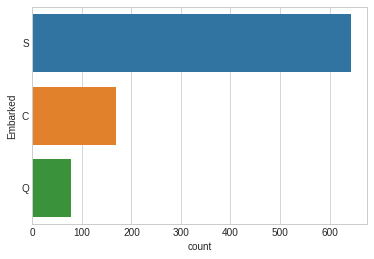

In [61]:
sns.countplot(y='Embarked',data = train)

In [62]:
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [63]:
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset = ['Embarked'])
print(len(df_con))

891
889


In [64]:
df_bin.head()

,Survived,Sex,SibSp,Parch,Fare,Embarked
0,0,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,0,"(-0.512, 102.466]",C
2,1,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,0,"(-0.512, 102.466]",S
4,0,0,0,0,"(-0.512, 102.466]",S


In [65]:
df_con.head()

,Survived,Sex,SibSp,Parch,Fare,Embarked
0,0,male,1,0,7.2500,S
1,1,female,1,0,71.2833,C
2,1,female,0,0,7.9250,S
3,1,female,1,0,53.1000,S
4,0,male,0,0,8.0500,S


In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_esc = pd.get_dummies(df_bin, columns=one_hot_cols)
df_bin_esc.head()

,Survived,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [68]:
df_con_esc = df_con.apply(LabelEncoder().fit_transform)
df_con_esc.head()

,Survived,Sex,SibSp,Parch,Fare,Embarked
0,0,1,1,0,18,2
1,1,0,1,0,207,0
2,1,0,0,0,41,2
3,1,0,1,0,189,2
4,0,1,0,0,43,2


In [69]:
df_con_esc.head(20)

,Survived,Sex,SibSp,Parch,Fare,Embarked
0,0,1,1,0,18,2
1,1,0,1,0,207,0
2,1,0,0,0,41,2
3,1,0,1,0,189,2
4,0,1,0,0,43,2
5,0,1,0,0,51,1
6,0,1,0,0,186,2
7,0,1,3,1,124,2
8,1,0,0,2,74,2
9,1,0,1,0,154,0


In [70]:
selected_df = df_con_esc

In [71]:
x_train = selected_df.drop('Survived',axis = 1)
y_train = selected_df.Survived

In [72]:
selected_df.head()

,Survived,Sex,SibSp,Parch,Fare,Embarked
0,0,1,1,0,18,2
1,1,0,1,0,207,0
2,1,0,0,0,41,2
3,1,0,1,0,189,2
4,0,1,0,0,43,2


In [73]:
x_train.head()

,Sex,SibSp,Parch,Fare,Embarked
0,1,1,0,18,2
1,0,1,0,207,0
2,0,0,0,41,2
3,0,1,0,189,2
4,1,0,0,43,2


In [74]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [75]:
def fit_ml_algo(algo, x_train, y_train, cv):
    model = algo.fit(x_train,y_train)
    acc = round(model.score(x_train, y_train) * 100,2)
    train_pred = model_selection.cross_val_predict(algo,
                                                  x_train,
                                                  y_train,
                                                  cv = cv,
                                                  n_jobs = -1)
    
    acc_cv = round(metrics.accuracy_score(y_train,train_pred)* 100, 2)
    return train_pred, acc, acc_cv

In [76]:
#LOGISTIC REGRESSION

start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(),
                                                 x_train,y_train,10)
log_time = (time.time() - start_time)
print('Accuracy: %s' %acc_log)
print('Accuracy CV 10-fold: %s' % acc_cv_log)
print('Running time: %s' %datetime.timedelta(seconds = log_time))

Accuracy: 78.74
Accuracy CV 10-fold: 78.4
Running time: 0:00:01.869101


In [77]:
#K-Nearest Neighbors
start_time = time.time()
train_pred_kns, acc_kns, acc_cv_kns = fit_ml_algo(KNeighborsClassifier(),
                                                 x_train,y_train,10)
kns_time = (time.time() - start_time)
print('Accuracy: %s' %acc_kns)
print('Accuracy CV 10-fold: %s' % acc_cv_kns)
print('Running time: %s' %datetime.timedelta(seconds = kns_time))

Accuracy: 81.21
Accuracy CV 10-fold: 74.35
Running time: 0:00:00.111552


In [78]:
#Gaussian
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(),
                                                 x_train,y_train,10)
gaussian_time = (time.time() - start_time)
print('Accuracy: %s' %acc_gaussian)
print('Accuracy CV 10-fold: %s' % acc_cv_gaussian)
print('Running time: %s' %datetime.timedelta(seconds = gaussian_time))

Accuracy: 78.29
Accuracy CV 10-fold: 78.18
Running time: 0:00:00.028704


In [79]:
#LinearSVC
start_time = time.time()
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(LinearSVC(),
                                                 x_train,y_train,10)
svc_time = (time.time() - start_time)
print('Accuracy: %s' %acc_svc)
print('Accuracy CV 10-fold: %s' % acc_cv_svc)
print('Running time: %s' %datetime.timedelta(seconds = svc_time))

Accuracy: 77.62
Accuracy CV 10-fold: 72.44
Running time: 0:00:00.156024


In [80]:
#Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(),
                                                 x_train,y_train,10)
sgd_time = (time.time() - start_time)
print('Accuracy: %s' %acc_sgd)
print('Accuracy CV 10-fold: %s' % acc_cv_sgd)
print('Running time: %s' %datetime.timedelta(seconds = sgd_time))

Accuracy: 72.44
Accuracy CV 10-fold: 68.5
Running time: 0:00:00.051719


In [81]:
#DecisionTreeClassifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(),
                                                 x_train,y_train,10)
dt_time = (time.time() - start_time)
print('Accuracy: %s' %acc_dt)
print('Accuracy CV 10-fold: %s' % acc_cv_dt)
print('Running time: %s' %datetime.timedelta(seconds = dt_time))

Accuracy: 92.46
Accuracy CV 10-fold: 78.63
Running time: 0:00:00.054737


In [82]:
#Gradient Boost Trees

start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(),
                                                 x_train,y_train,10)
gbt_time = (time.time() - start_time)
print('Accuracy: %s' %acc_gbt)
print('Accuracy CV 10-fold: %s' % acc_cv_gbt)
print('Running time: %s' %datetime.timedelta(seconds = gbt_time))

Accuracy: 85.38
Accuracy CV 10-fold: 79.53
Running time: 0:00:00.416052


In [83]:
#CATBOOST ALGORITHM

x_train.head()

,Sex,SibSp,Parch,Fare,Embarked
0,1,1,0,18,2
1,0,1,0,207,0
2,0,0,0,41,2
3,0,1,0,189,2
4,1,0,0,43,2


In [84]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [85]:
cat_features = np.where(x_train.dtypes != np.float)[0]
cat_features

array([0, 1, 2, 3, 4])

In [86]:
train_pool = Pool(x_train,y_train,cat_features)

In [87]:
catboost_model = CatBoostClassifier(iterations = 1000,
                                   custom_loss = ['Accuracy'],
                                   loss_function = 'Logloss')

catboost_model.fit(train_pool,
                  plot = True)

acc_catboost = round(catboost_model.score(x_train,y_train)*100,2)

Learning rate set to 0.009797


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6887255	total: 51.8ms	remaining: 51.8s
1:	learn: 0.6849231	total: 54.5ms	remaining: 27.2s
2:	learn: 0.6808769	total: 63.6ms	remaining: 21.1s
3:	learn: 0.6769141	total: 85.4ms	remaining: 21.3s
4:	learn: 0.6731974	total: 89.4ms	remaining: 17.8s
5:	learn: 0.6696652	total: 95.5ms	remaining: 15.8s
6:	learn: 0.6661147	total: 99.5ms	remaining: 14.1s
7:	learn: 0.6623412	total: 103ms	remaining: 12.7s
8:	learn: 0.6583393	total: 106ms	remaining: 11.6s
9:	learn: 0.6551318	total: 107ms	remaining: 10.6s
10:	learn: 0.6517154	total: 110ms	remaining: 9.85s
11:	learn: 0.6481737	total: 112ms	remaining: 9.25s
12:	learn: 0.6448456	total: 115ms	remaining: 8.74s
13:	learn: 0.6420173	total: 117ms	remaining: 8.23s
14:	learn: 0.6391546	total: 118ms	remaining: 7.77s
15:	learn: 0.6357327	total: 121ms	remaining: 7.46s
16:	learn: 0.6329843	total: 123ms	remaining: 7.11s
17:	learn: 0.6300346	total: 125ms	remaining: 6.84s
18:	learn: 0.6270852	total: 130ms	remaining: 6.69s
19:	learn: 0.6240650	total: 133ms	

163:	learn: 0.4549842	total: 517ms	remaining: 2.63s
164:	learn: 0.4546167	total: 519ms	remaining: 2.63s
165:	learn: 0.4541710	total: 521ms	remaining: 2.62s
166:	learn: 0.4537292	total: 524ms	remaining: 2.61s
167:	learn: 0.4533791	total: 526ms	remaining: 2.61s
168:	learn: 0.4532330	total: 529ms	remaining: 2.6s
169:	learn: 0.4532207	total: 529ms	remaining: 2.58s
170:	learn: 0.4527299	total: 531ms	remaining: 2.58s
171:	learn: 0.4522586	total: 533ms	remaining: 2.57s
172:	learn: 0.4521730	total: 534ms	remaining: 2.55s
173:	learn: 0.4520890	total: 535ms	remaining: 2.54s
174:	learn: 0.4517420	total: 538ms	remaining: 2.54s
175:	learn: 0.4513761	total: 541ms	remaining: 2.53s
176:	learn: 0.4507776	total: 543ms	remaining: 2.52s
177:	learn: 0.4506520	total: 545ms	remaining: 2.52s
178:	learn: 0.4505639	total: 546ms	remaining: 2.5s
179:	learn: 0.4504854	total: 547ms	remaining: 2.49s
180:	learn: 0.4501895	total: 551ms	remaining: 2.49s
181:	learn: 0.4494975	total: 554ms	remaining: 2.49s
182:	learn: 0.

330:	learn: 0.4104942	total: 897ms	remaining: 1.81s
331:	learn: 0.4102271	total: 900ms	remaining: 1.81s
332:	learn: 0.4099932	total: 902ms	remaining: 1.81s
333:	learn: 0.4098652	total: 904ms	remaining: 1.8s
334:	learn: 0.4095482	total: 906ms	remaining: 1.8s
335:	learn: 0.4093682	total: 909ms	remaining: 1.79s
336:	learn: 0.4091770	total: 911ms	remaining: 1.79s
337:	learn: 0.4089372	total: 914ms	remaining: 1.79s
338:	learn: 0.4084476	total: 917ms	remaining: 1.79s
339:	learn: 0.4083189	total: 919ms	remaining: 1.78s
340:	learn: 0.4081880	total: 921ms	remaining: 1.78s
341:	learn: 0.4078767	total: 926ms	remaining: 1.78s
342:	learn: 0.4076372	total: 929ms	remaining: 1.78s
343:	learn: 0.4075330	total: 932ms	remaining: 1.78s
344:	learn: 0.4073751	total: 936ms	remaining: 1.78s
345:	learn: 0.4072353	total: 938ms	remaining: 1.77s
346:	learn: 0.4070653	total: 942ms	remaining: 1.77s
347:	learn: 0.4068991	total: 944ms	remaining: 1.77s
348:	learn: 0.4065982	total: 946ms	remaining: 1.76s
349:	learn: 0.

490:	learn: 0.3861721	total: 1.28s	remaining: 1.32s
491:	learn: 0.3861278	total: 1.28s	remaining: 1.32s
492:	learn: 0.3858604	total: 1.28s	remaining: 1.32s
493:	learn: 0.3858180	total: 1.28s	remaining: 1.32s
494:	learn: 0.3858145	total: 1.29s	remaining: 1.31s
495:	learn: 0.3854818	total: 1.29s	remaining: 1.31s
496:	learn: 0.3853871	total: 1.29s	remaining: 1.31s
497:	learn: 0.3853213	total: 1.3s	remaining: 1.31s
498:	learn: 0.3851251	total: 1.3s	remaining: 1.3s
499:	learn: 0.3849890	total: 1.3s	remaining: 1.3s
500:	learn: 0.3848539	total: 1.3s	remaining: 1.3s
501:	learn: 0.3848088	total: 1.31s	remaining: 1.3s
502:	learn: 0.3847540	total: 1.31s	remaining: 1.29s
503:	learn: 0.3846667	total: 1.31s	remaining: 1.29s
504:	learn: 0.3846208	total: 1.31s	remaining: 1.29s
505:	learn: 0.3845471	total: 1.32s	remaining: 1.28s
506:	learn: 0.3843621	total: 1.32s	remaining: 1.28s
507:	learn: 0.3842652	total: 1.32s	remaining: 1.28s
508:	learn: 0.3841240	total: 1.32s	remaining: 1.27s
509:	learn: 0.384031

659:	learn: 0.3682321	total: 1.66s	remaining: 855ms
660:	learn: 0.3681722	total: 1.66s	remaining: 852ms
661:	learn: 0.3681140	total: 1.67s	remaining: 851ms
662:	learn: 0.3679353	total: 1.67s	remaining: 849ms
663:	learn: 0.3678698	total: 1.67s	remaining: 846ms
664:	learn: 0.3676861	total: 1.67s	remaining: 843ms
665:	learn: 0.3676313	total: 1.68s	remaining: 840ms
666:	learn: 0.3675567	total: 1.68s	remaining: 838ms
667:	learn: 0.3672723	total: 1.68s	remaining: 835ms
668:	learn: 0.3671803	total: 1.68s	remaining: 833ms
669:	learn: 0.3670722	total: 1.69s	remaining: 830ms
670:	learn: 0.3669331	total: 1.69s	remaining: 827ms
671:	learn: 0.3668097	total: 1.69s	remaining: 824ms
672:	learn: 0.3667053	total: 1.69s	remaining: 822ms
673:	learn: 0.3666854	total: 1.69s	remaining: 818ms
674:	learn: 0.3665710	total: 1.69s	remaining: 816ms
675:	learn: 0.3664689	total: 1.7s	remaining: 813ms
676:	learn: 0.3664663	total: 1.7s	remaining: 810ms
677:	learn: 0.3663963	total: 1.7s	remaining: 807ms
678:	learn: 0.3

832:	learn: 0.3510001	total: 2.04s	remaining: 409ms
833:	learn: 0.3508985	total: 2.04s	remaining: 406ms
834:	learn: 0.3508830	total: 2.04s	remaining: 404ms
835:	learn: 0.3508420	total: 2.04s	remaining: 401ms
836:	learn: 0.3507838	total: 2.05s	remaining: 399ms
837:	learn: 0.3507610	total: 2.05s	remaining: 396ms
838:	learn: 0.3507495	total: 2.05s	remaining: 393ms
839:	learn: 0.3507354	total: 2.05s	remaining: 391ms
840:	learn: 0.3506735	total: 2.05s	remaining: 388ms
841:	learn: 0.3504607	total: 2.05s	remaining: 385ms
842:	learn: 0.3504323	total: 2.06s	remaining: 383ms
843:	learn: 0.3502986	total: 2.06s	remaining: 381ms
844:	learn: 0.3501337	total: 2.06s	remaining: 378ms
845:	learn: 0.3500888	total: 2.06s	remaining: 376ms
846:	learn: 0.3500430	total: 2.06s	remaining: 373ms
847:	learn: 0.3497629	total: 2.07s	remaining: 371ms
848:	learn: 0.3497609	total: 2.07s	remaining: 368ms
849:	learn: 0.3496652	total: 2.07s	remaining: 366ms
850:	learn: 0.3496045	total: 2.08s	remaining: 363ms
851:	learn: 

997:	learn: 0.3375983	total: 2.42s	remaining: 4.86ms
998:	learn: 0.3374251	total: 2.42s	remaining: 2.43ms
999:	learn: 0.3373400	total: 2.43s	remaining: 0us


In [88]:
start_time = time.time()
cv_params = catboost_model.get_params()
cv_data = cv(train_pool,cv_params,fold_count = 10, plot = True)
catboost_time = (time.time() - start_time)
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6805963	test: 0.6810649	best: 0.6810649 (0)	total: 161ms	remaining: 2m 41s
1:	learn: 0.6693602	test: 0.6701675	best: 0.6701675 (1)	total: 261ms	remaining: 2m 10s
2:	learn: 0.6580956	test: 0.6595110	best: 0.6595110 (2)	total: 395ms	remaining: 2m 11s
3:	learn: 0.6478978	test: 0.6495473	best: 0.6495473 (3)	total: 543ms	remaining: 2m 15s
4:	learn: 0.6380595	test: 0.6401108	best: 0.6401108 (4)	total: 710ms	remaining: 2m 21s
5:	learn: 0.6283986	test: 0.6312569	best: 0.6312569 (5)	total: 872ms	remaining: 2m 24s
6:	learn: 0.6198481	test: 0.6233636	best: 0.6233636 (6)	total: 1.04s	remaining: 2m 27s
7:	learn: 0.6117808	test: 0.6156525	best: 0.6156525 (7)	total: 1.19s	remaining: 2m 27s
8:	learn: 0.6037740	test: 0.6080882	best: 0.6080882 (8)	total: 1.34s	remaining: 2m 28s
9:	learn: 0.5963220	test: 0.6010228	best: 0.6010228 (9)	total: 1.45s	remaining: 2m 23s
10:	learn: 0.5898921	test: 0.5950222	best: 0.5950222 (10)	total: 1.62s	remaining: 2m 25s
11:	learn: 0.5838422	test: 0.5894093	best

94:	learn: 0.4231182	test: 0.4616366	best: 0.4616366 (94)	total: 13s	remaining: 2m 3s
95:	learn: 0.4224976	test: 0.4613850	best: 0.4613850 (95)	total: 13.1s	remaining: 2m 3s
96:	learn: 0.4220512	test: 0.4611585	best: 0.4611585 (96)	total: 13.2s	remaining: 2m 2s
97:	learn: 0.4214820	test: 0.4608753	best: 0.4608753 (97)	total: 13.4s	remaining: 2m 3s
98:	learn: 0.4207898	test: 0.4607280	best: 0.4607280 (98)	total: 13.5s	remaining: 2m 2s
99:	learn: 0.4202462	test: 0.4605471	best: 0.4605471 (99)	total: 13.7s	remaining: 2m 3s
100:	learn: 0.4195755	test: 0.4603179	best: 0.4603179 (100)	total: 13.8s	remaining: 2m 3s
101:	learn: 0.4189667	test: 0.4598684	best: 0.4598684 (101)	total: 13.9s	remaining: 2m 2s
102:	learn: 0.4184256	test: 0.4597793	best: 0.4597793 (102)	total: 14.1s	remaining: 2m 2s
103:	learn: 0.4177636	test: 0.4597313	best: 0.4597313 (103)	total: 14.3s	remaining: 2m 2s
104:	learn: 0.4170806	test: 0.4592594	best: 0.4592594 (104)	total: 14.5s	remaining: 2m 3s
105:	learn: 0.4164832	te

185:	learn: 0.3832723	test: 0.4547264	best: 0.4545934 (181)	total: 24.4s	remaining: 1m 46s
186:	learn: 0.3827706	test: 0.4547108	best: 0.4545934 (181)	total: 24.6s	remaining: 1m 46s
187:	learn: 0.3823514	test: 0.4547033	best: 0.4545934 (181)	total: 24.7s	remaining: 1m 46s
188:	learn: 0.3820140	test: 0.4545537	best: 0.4545537 (188)	total: 24.7s	remaining: 1m 46s
189:	learn: 0.3815876	test: 0.4547171	best: 0.4545537 (188)	total: 24.9s	remaining: 1m 45s
190:	learn: 0.3812744	test: 0.4545330	best: 0.4545330 (190)	total: 25s	remaining: 1m 45s
191:	learn: 0.3809049	test: 0.4546955	best: 0.4545330 (190)	total: 25.3s	remaining: 1m 46s
192:	learn: 0.3806567	test: 0.4546739	best: 0.4545330 (190)	total: 25.4s	remaining: 1m 46s
193:	learn: 0.3803983	test: 0.4545485	best: 0.4545330 (190)	total: 25.5s	remaining: 1m 46s
194:	learn: 0.3799657	test: 0.4544894	best: 0.4544894 (194)	total: 25.7s	remaining: 1m 46s
195:	learn: 0.3797200	test: 0.4545935	best: 0.4544894 (194)	total: 25.8s	remaining: 1m 45s
1

276:	learn: 0.3534747	test: 0.4554389	best: 0.4539542 (212)	total: 35.4s	remaining: 1m 32s
277:	learn: 0.3530797	test: 0.4554483	best: 0.4539542 (212)	total: 35.5s	remaining: 1m 32s
278:	learn: 0.3527939	test: 0.4552737	best: 0.4539542 (212)	total: 35.6s	remaining: 1m 32s
279:	learn: 0.3525764	test: 0.4552856	best: 0.4539542 (212)	total: 35.8s	remaining: 1m 32s
280:	learn: 0.3522411	test: 0.4553209	best: 0.4539542 (212)	total: 36s	remaining: 1m 32s
281:	learn: 0.3520137	test: 0.4552975	best: 0.4539542 (212)	total: 36.1s	remaining: 1m 31s
282:	learn: 0.3517275	test: 0.4554242	best: 0.4539542 (212)	total: 36.2s	remaining: 1m 31s
283:	learn: 0.3513902	test: 0.4555046	best: 0.4539542 (212)	total: 36.3s	remaining: 1m 31s
284:	learn: 0.3510110	test: 0.4555506	best: 0.4539542 (212)	total: 36.4s	remaining: 1m 31s
285:	learn: 0.3507648	test: 0.4555143	best: 0.4539542 (212)	total: 36.5s	remaining: 1m 31s
286:	learn: 0.3505344	test: 0.4554866	best: 0.4539542 (212)	total: 36.6s	remaining: 1m 30s
2

367:	learn: 0.3282104	test: 0.4595919	best: 0.4539542 (212)	total: 47.3s	remaining: 1m 21s
368:	learn: 0.3279310	test: 0.4597056	best: 0.4539542 (212)	total: 47.4s	remaining: 1m 20s
369:	learn: 0.3277315	test: 0.4597992	best: 0.4539542 (212)	total: 47.4s	remaining: 1m 20s
370:	learn: 0.3275349	test: 0.4598293	best: 0.4539542 (212)	total: 47.5s	remaining: 1m 20s
371:	learn: 0.3273003	test: 0.4599236	best: 0.4539542 (212)	total: 47.6s	remaining: 1m 20s
372:	learn: 0.3270572	test: 0.4598282	best: 0.4539542 (212)	total: 47.7s	remaining: 1m 20s
373:	learn: 0.3268181	test: 0.4599282	best: 0.4539542 (212)	total: 47.8s	remaining: 1m 19s
374:	learn: 0.3265100	test: 0.4601022	best: 0.4539542 (212)	total: 47.9s	remaining: 1m 19s
375:	learn: 0.3261947	test: 0.4601447	best: 0.4539542 (212)	total: 48s	remaining: 1m 19s
376:	learn: 0.3258952	test: 0.4603929	best: 0.4539542 (212)	total: 48.1s	remaining: 1m 19s
377:	learn: 0.3257159	test: 0.4603450	best: 0.4539542 (212)	total: 48.2s	remaining: 1m 19s
3

458:	learn: 0.3069873	test: 0.4663674	best: 0.4539542 (212)	total: 58.6s	remaining: 1m 9s
459:	learn: 0.3068143	test: 0.4664083	best: 0.4539542 (212)	total: 58.8s	remaining: 1m 8s
460:	learn: 0.3065380	test: 0.4663376	best: 0.4539542 (212)	total: 58.9s	remaining: 1m 8s
461:	learn: 0.3063455	test: 0.4665043	best: 0.4539542 (212)	total: 58.9s	remaining: 1m 8s
462:	learn: 0.3062223	test: 0.4665297	best: 0.4539542 (212)	total: 59s	remaining: 1m 8s
463:	learn: 0.3060145	test: 0.4665514	best: 0.4539542 (212)	total: 59.1s	remaining: 1m 8s
464:	learn: 0.3058196	test: 0.4665535	best: 0.4539542 (212)	total: 59.2s	remaining: 1m 8s
465:	learn: 0.3055552	test: 0.4665896	best: 0.4539542 (212)	total: 59.3s	remaining: 1m 7s
466:	learn: 0.3053644	test: 0.4667064	best: 0.4539542 (212)	total: 59.4s	remaining: 1m 7s
467:	learn: 0.3051058	test: 0.4666896	best: 0.4539542 (212)	total: 59.5s	remaining: 1m 7s
468:	learn: 0.3048533	test: 0.4668249	best: 0.4539542 (212)	total: 59.6s	remaining: 1m 7s
469:	learn: 

551:	learn: 0.2879633	test: 0.4725159	best: 0.4539542 (212)	total: 1m 11s	remaining: 57.8s
552:	learn: 0.2877297	test: 0.4727204	best: 0.4539542 (212)	total: 1m 11s	remaining: 57.7s
553:	learn: 0.2875114	test: 0.4728852	best: 0.4539542 (212)	total: 1m 11s	remaining: 57.6s
554:	learn: 0.2872177	test: 0.4729047	best: 0.4539542 (212)	total: 1m 11s	remaining: 57.5s
555:	learn: 0.2870240	test: 0.4728632	best: 0.4539542 (212)	total: 1m 11s	remaining: 57.3s
556:	learn: 0.2868800	test: 0.4729265	best: 0.4539542 (212)	total: 1m 11s	remaining: 57.2s
557:	learn: 0.2866542	test: 0.4729975	best: 0.4539542 (212)	total: 1m 12s	remaining: 57.1s
558:	learn: 0.2864688	test: 0.4730949	best: 0.4539542 (212)	total: 1m 12s	remaining: 57s
559:	learn: 0.2862529	test: 0.4732082	best: 0.4539542 (212)	total: 1m 12s	remaining: 56.9s
560:	learn: 0.2860586	test: 0.4732548	best: 0.4539542 (212)	total: 1m 12s	remaining: 57s
561:	learn: 0.2858689	test: 0.4733227	best: 0.4539542 (212)	total: 1m 12s	remaining: 56.9s
562

642:	learn: 0.2711090	test: 0.4787108	best: 0.4539542 (212)	total: 1m 25s	remaining: 47.3s
643:	learn: 0.2709218	test: 0.4787018	best: 0.4539542 (212)	total: 1m 25s	remaining: 47.2s
644:	learn: 0.2707840	test: 0.4788399	best: 0.4539542 (212)	total: 1m 25s	remaining: 47.1s
645:	learn: 0.2705633	test: 0.4789793	best: 0.4539542 (212)	total: 1m 25s	remaining: 46.9s
646:	learn: 0.2704168	test: 0.4790687	best: 0.4539542 (212)	total: 1m 26s	remaining: 46.9s
647:	learn: 0.2702544	test: 0.4791731	best: 0.4539542 (212)	total: 1m 26s	remaining: 46.8s
648:	learn: 0.2700813	test: 0.4792500	best: 0.4539542 (212)	total: 1m 26s	remaining: 46.6s
649:	learn: 0.2699237	test: 0.4792022	best: 0.4539542 (212)	total: 1m 26s	remaining: 46.5s
650:	learn: 0.2696946	test: 0.4792740	best: 0.4539542 (212)	total: 1m 26s	remaining: 46.3s
651:	learn: 0.2695274	test: 0.4792236	best: 0.4539542 (212)	total: 1m 26s	remaining: 46.2s
652:	learn: 0.2693784	test: 0.4794230	best: 0.4539542 (212)	total: 1m 26s	remaining: 46.1s

735:	learn: 0.2561764	test: 0.4835850	best: 0.4539542 (212)	total: 1m 37s	remaining: 35s
736:	learn: 0.2559400	test: 0.4838012	best: 0.4539542 (212)	total: 1m 37s	remaining: 34.8s
737:	learn: 0.2558020	test: 0.4838826	best: 0.4539542 (212)	total: 1m 37s	remaining: 34.7s
738:	learn: 0.2556236	test: 0.4839099	best: 0.4539542 (212)	total: 1m 37s	remaining: 34.5s
739:	learn: 0.2555005	test: 0.4839852	best: 0.4539542 (212)	total: 1m 37s	remaining: 34.4s
740:	learn: 0.2553098	test: 0.4839552	best: 0.4539542 (212)	total: 1m 37s	remaining: 34.2s
741:	learn: 0.2551670	test: 0.4840834	best: 0.4539542 (212)	total: 1m 38s	remaining: 34.1s
742:	learn: 0.2550545	test: 0.4841237	best: 0.4539542 (212)	total: 1m 38s	remaining: 34s
743:	learn: 0.2549047	test: 0.4841593	best: 0.4539542 (212)	total: 1m 38s	remaining: 33.8s
744:	learn: 0.2547545	test: 0.4843868	best: 0.4539542 (212)	total: 1m 38s	remaining: 33.7s
745:	learn: 0.2545759	test: 0.4844336	best: 0.4539542 (212)	total: 1m 38s	remaining: 33.5s
746

828:	learn: 0.2426025	test: 0.4888626	best: 0.4539542 (212)	total: 1m 47s	remaining: 22.3s
829:	learn: 0.2424809	test: 0.4889787	best: 0.4539542 (212)	total: 1m 47s	remaining: 22.1s
830:	learn: 0.2423551	test: 0.4891449	best: 0.4539542 (212)	total: 1m 48s	remaining: 22s
831:	learn: 0.2421892	test: 0.4892733	best: 0.4539542 (212)	total: 1m 48s	remaining: 21.8s
832:	learn: 0.2420622	test: 0.4894099	best: 0.4539542 (212)	total: 1m 48s	remaining: 21.7s
833:	learn: 0.2419558	test: 0.4894984	best: 0.4539542 (212)	total: 1m 48s	remaining: 21.6s
834:	learn: 0.2418152	test: 0.4896294	best: 0.4539542 (212)	total: 1m 48s	remaining: 21.4s
835:	learn: 0.2416840	test: 0.4897243	best: 0.4539542 (212)	total: 1m 48s	remaining: 21.3s
836:	learn: 0.2415718	test: 0.4897375	best: 0.4539542 (212)	total: 1m 48s	remaining: 21.2s
837:	learn: 0.2414670	test: 0.4898764	best: 0.4539542 (212)	total: 1m 48s	remaining: 21s
838:	learn: 0.2413466	test: 0.4899254	best: 0.4539542 (212)	total: 1m 49s	remaining: 21s
839:	

919:	learn: 0.2312409	test: 0.4940218	best: 0.4539542 (212)	total: 2m 1s	remaining: 10.5s
920:	learn: 0.2311147	test: 0.4939515	best: 0.4539542 (212)	total: 2m 1s	remaining: 10.4s
921:	learn: 0.2310056	test: 0.4939277	best: 0.4539542 (212)	total: 2m 1s	remaining: 10.3s
922:	learn: 0.2309098	test: 0.4940333	best: 0.4539542 (212)	total: 2m 1s	remaining: 10.2s
923:	learn: 0.2307899	test: 0.4940328	best: 0.4539542 (212)	total: 2m 2s	remaining: 10s
924:	learn: 0.2306847	test: 0.4940693	best: 0.4539542 (212)	total: 2m 2s	remaining: 9.91s
925:	learn: 0.2306009	test: 0.4940299	best: 0.4539542 (212)	total: 2m 2s	remaining: 9.78s
926:	learn: 0.2305151	test: 0.4940486	best: 0.4539542 (212)	total: 2m 2s	remaining: 9.65s
927:	learn: 0.2304024	test: 0.4941458	best: 0.4539542 (212)	total: 2m 2s	remaining: 9.52s
928:	learn: 0.2302968	test: 0.4940519	best: 0.4539542 (212)	total: 2m 3s	remaining: 9.41s
929:	learn: 0.2301919	test: 0.4939989	best: 0.4539542 (212)	total: 2m 3s	remaining: 9.28s
930:	learn: 

In [89]:
print('---CatBoost Metrics---')
print('Accuracy: {}'.format(acc_catboost))
print('Accuracy CV 10-fold: {}'.format(acc_cv_catboost))
print('Running Time: {}'.format(datetime.timedelta(seconds= catboost_time)))

---CatBoost Metrics---
Accuracy: 87.18
Accuracy CV 10-fold: 80.54
Running Time: 0:02:15.594670


In [90]:
metrics = ['Precision','Recall','F1','AUC']
eval_metrics = catboost_model.eval_metrics(train_pool,metrics = metrics, plot =True)  
for metric in metrics:
    print(str(metric) + ': {}'.format(np.mean(eval_metrics[metric])))


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8439985094651145
Recall: 0.737105882352941
F1: 0.7868706040730965
AUC: 0.9140224900889318


In [91]:
wanted_test_columns = df_con.drop('Survived', axis = 1).columns
wanted_test_columns

Index(['Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [92]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [93]:
x_train.head()

,Sex,SibSp,Parch,Fare,Embarked
0,1,1,0,18,2
1,0,1,0,207,0
2,0,0,0,41,2
3,0,1,0,189,2
4,1,0,0,43,2


In [94]:
predictions = catboost_model.predict(test[wanted_test_columns].apply(LabelEncoder().fit_transform))

In [95]:
predictions[:20]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [96]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [97]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [98]:
submission['Survived'] = submission['Survived'].astype(int)

In [99]:
if len(submission) == len(test):
    print('Submission DataFrame is the same length as test {} rows.'.format(len(submission)))
else:
    print('No Submission to Kaggle')

Submission DataFrame is the same length as test 418 rows.


In [100]:
submission.to_csv('Kaggle_submission.csv',index = False)

In [101]:
submissions_check = pd.read_csv('Kaggle_submission.csv')
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
